#                     Data Analyst Project – Retain first attempt

## Elchai Refoua

### 1.import liebreris

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

### 2.Data Import

In [119]:
df = pd.read_csv('hackathon_date_1_year_labelled_anonymized.csv')
# Get a glimpse of data
df.head()

,id,email_id,autobill_id,autobill_cycle,billing_plan_cycle,transaction_billing_index_number,merchant_tx_identifier,payment_provider,payment_method_id,credit_card_bin,...,recurring,partial_auth,forced_deposit,partial_auth_amount,calc_is_prepaid_card,current_disposition,current_disposition_labelled,transaction_billing_id_anonymized,merchant_id_anonymized,current_merchant_customer_id_anonymized
0,1785322944,NaN,309162071,NaN,NaN,0,24977665,Unknown,737845699,NaN,...,NaN,NaN,NaN,NaN,NaN,Cancelled,0,Transaction_1,Merchant_1,current_merchant_customer_1
1,1774345921,NaN,307891835,NaN,NaN,0,9069E3E7-0006,Unknown,734304000,NaN,...,NaN,NaN,NaN,NaN,NaN,Cancelled,0,Transaction_2,Merchant_2,current_merchant_customer_2
2,1720660362,NaN,302512456,NaN,NaN,0,6FEF75E9-0021,Unknown,716672673,NaN,...,NaN,NaN,NaN,NaN,NaN,Cancelled,0,Transaction_3,Merchant_2,current_merchant_customer_3
3,1717460844,NaN,302249865,NaN,NaN,0,4D6A055-0073,Unknown,715447380,NaN,...,NaN,NaN,NaN,NaN,NaN,Cancelled,0,Transaction_4,Merchant_2,current_merchant_customer_4
4,1848322431,NaN,315695553,0.0,0.0,1,PMN10344634,Edgil,759752453,474477.0,...,1.0,1.0,NaN,NaN,False,Cancelled,0,Transaction_5,Merchant_3,current_merchant_customer_5


In [174]:
num_rows = len(df)
print(f"The number of rows in the DataFrame is {num_rows}")


The number of rows in the DataFrame is 1048575


### 3.Basic Understanding

In [3]:
# Checking for missing values
print(df.isnull().sum())

id                                               0
email_id                                   1044645
autobill_id                                      0
autobill_cycle                                   4
billing_plan_cycle                               4
transaction_billing_index_number                 0
merchant_tx_identifier                           0
payment_provider                                 0
payment_method_id                                0
credit_card_bin                              81221
credit_card_type                             81241
credit_card_brand                            81232
credit_card_issuing_bank                     94093
credit_card_issuing_bank_country             81237
amount                                           0
calc_merchant_day_exchange_rate                  0
currency_alphabetic_code                         0
submitted_ts                                     0
postal_code                                  46200
address_country                

In [4]:
# we can see that:
# email_id                                   1044645
#forced_deposit                             1047633
#partial_auth_amount                        1040422
#are mostly NULL values, probebly because they are private values


In [5]:
# Check data types
print(df.dtypes)

id                                           int64
email_id                                   float64
autobill_id                                  int64
autobill_cycle                             float64
billing_plan_cycle                         float64
transaction_billing_index_number             int64
merchant_tx_identifier                      object
payment_provider                            object
payment_method_id                            int64
credit_card_bin                            float64
credit_card_type                            object
credit_card_brand                           object
credit_card_issuing_bank                    object
credit_card_issuing_bank_country            object
amount                                     float64
calc_merchant_day_exchange_rate            float64
currency_alphabetic_code                    object
submitted_ts                                object
postal_code                                 object
address_country                

In [6]:
# lets research the data
#lets look on the vars and check who influens by grafs, then we will consetrate on surtain tipes 
# lets select few vars an present by the var type

#### Histogram for 'amount'

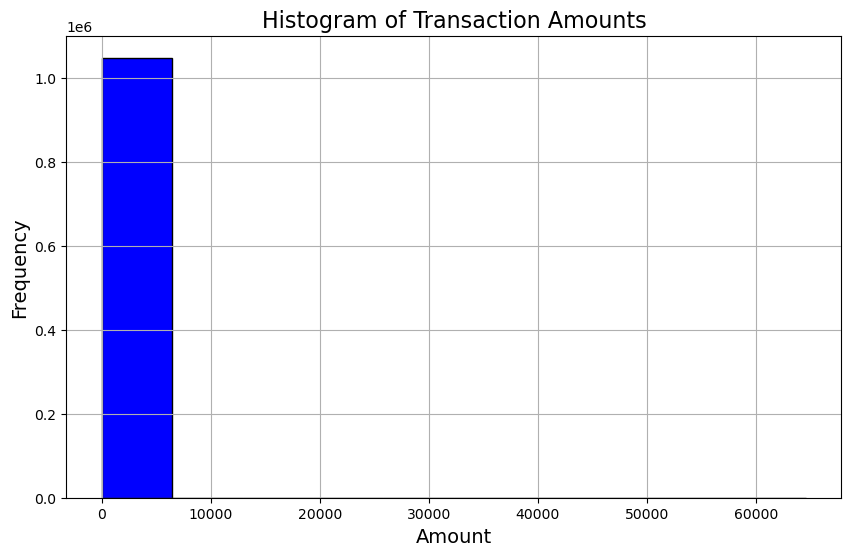

In [7]:
plt.figure(figsize=(10,6))
plt.hist(df['amount'], color ='blue', edgecolor='black')
plt.xlabel('Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Transaction Amounts', fontsize=16)
plt.grid(True)
plt.show()

most of the amount is seen above exept of small amount around 60k

we can see from the explantion thet the var we would like to examin is current_disposition_labelled- label for the task (1 if captured or refunded, else 0)

we want to achive 1 - sucsses

#### Boxplot for 'amount' across different dispositions

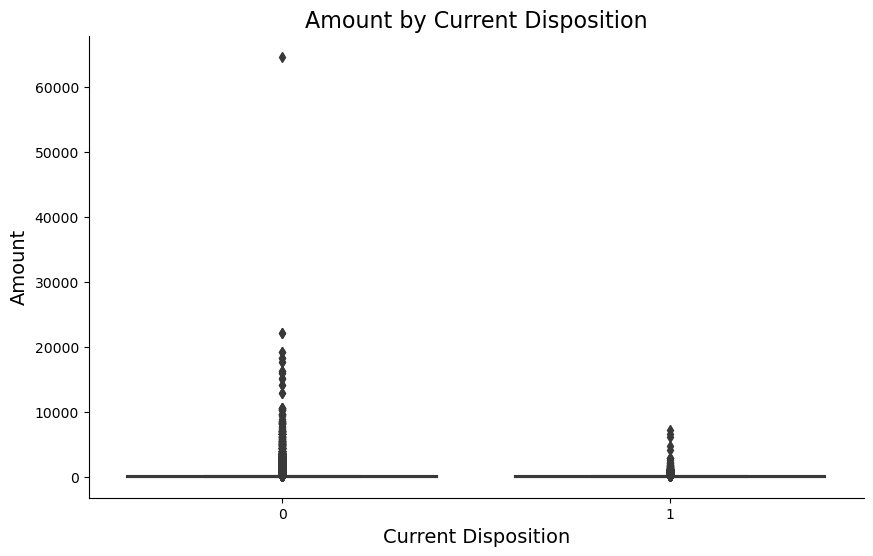

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(x='current_disposition_labelled', y='amount', data=df, palette='viridis')
plt.xlabel('Current Disposition', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.title('Amount by Current Disposition', fontsize=16)
sns.despine() 
plt.show()

 we can see that ther are lots of failors - and ther is a litlle influnce on a failure of transaction where the amount is very hight

#### Correlation Analysis
#### lets check corolation of the macro and then we will consentrate on spesifics

In [10]:
correlation = df.corr()
correlation['current_disposition_labelled'].sort_values(ascending=False)
print(correlation)

                                        id  email_id  autobill_id  \
id                                1.000000  0.971577     0.499386   
email_id                          0.971577  1.000000     0.996644   
autobill_id                       0.499386  0.996644     1.000000   
autobill_cycle                    0.024213       NaN    -0.108226   
billing_plan_cycle                0.024213       NaN    -0.108226   
transaction_billing_index_number -0.013939 -0.078838    -0.030374   
payment_method_id                 0.760466  0.999846     0.542880   
credit_card_bin                  -0.014338  0.011948    -0.015418   
amount                            0.008633 -0.376298    -0.013484   
calc_merchant_day_exchange_rate   0.050074       NaN     0.013484   
recurring                         0.013313  0.078838     0.030887   
partial_auth                      0.027233       NaN     0.019089   
forced_deposit                         NaN       NaN          NaN   
partial_auth_amount               

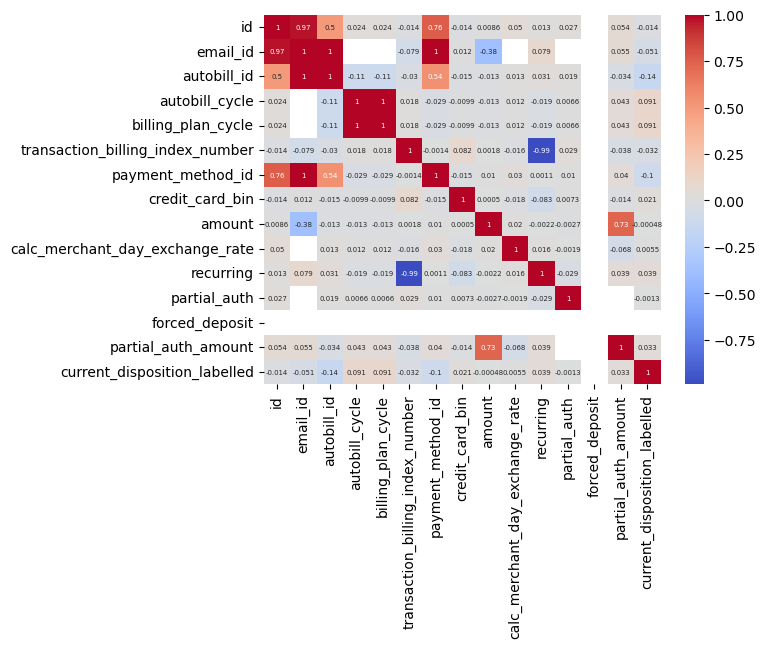

In [15]:
sns.heatmap(correlation, annot=True, cmap='coolwarm', annot_kws={"size": 5})
plt.show()


In [16]:
# we can see that the corr of
#payment_method_id                  -0.100911 - wich is the highst of all
#but payment_methot_id is : categorial wich mean its an id and dont have a Continuous var influens so lets move forward with the checking 
# in a dition the cor of amount = wich is Continuous is very low wich means there is no nesery cor


In [17]:
#we can see from looking on the data that the vars that influence our test var('current_disposition_labelled')
# are eather continious  or categorial
# we will select them and examin them sepertly


###  4.lets check the Continuous vars 

we will use corelation test for relevent vars- since this is what neede for a conitinouse vars -from what we see those are the  vars needed:

 #### 4.A. 'division_number' Correlation

specific to the merchant (the way a merchant has set up their accounts with the payment provider). Each merchant can have different division numbers. It can be useful, e.g. for income tax purposes, or for payment provider to identify where the money should be deposited to. A merchant can have different division numbers in different countries with different currencies. payment_provider, merchant, and division_number are three elements to be considered together. 

In [60]:
print(df['division_number'].head(20))

0                        45
1                     12345
2                     12345
3                     12345
4                       219
5                     71183
6                    325377
7                1002622024
8                       213
9                    oscirc
10                   806034
11                  AJC|AJC
12                       45
13                C_NYP|NYP
14                      213
15                  thccirc
16                      162
17                  8787889
18                   806129
19    acct_19ukmFC7atEnxftl
Name: division_number, dtype: object


In [19]:
# we can see the data is messy
# lets make it no null and only numeric
# we will make it in a different d_f

In [20]:

# we will make it in a different d_f
df_new = df.copy() 

# Convert 'division_number' to numeric, errors are coerced to NaN
df_new['division_number'] = pd.to_numeric(df_new['division_number'], errors='coerce')

# Remove NaN values
df_new = df_new.dropna(subset=['division_number'])

# Now we can calculate the correlation
correlation = df_new['division_number'].corr(df_new['current_disposition_labelled'])
print(correlation)

-0.017570688822195576


In [ ]:
# -0.017570688822195576 - it is low and we can see there is  berly no corolation

in adition we can see that the defenition of this var is defined as:"(the way a merchant has set up their accounts with the payment provider" wich dont sopuse to influence so much

 #### 4.B. 'Amount' Correlation 

as we saw- there are no nulls so no cleaning needed

In [59]:
print(df['amount'].head(10))

0     19.96
1     74.00
2    400.00
3    400.00
4    142.74
5     39.95
6     24.95
7     98.75
8     17.28
9     15.96
Name: amount, dtype: float64


In [22]:
unique_values = df['amount'].unique()

print(unique_values)

[  19.96   74.    400.   ...   51.11 1208.     76.34]


In [23]:
correlation = df[['amount', 'current_disposition_labelled']].corr()

print(correlation)

                                amount  current_disposition_labelled
amount                        1.000000                     -0.000484
current_disposition_labelled -0.000484                      1.000000


very low correlation  -0.000484

 #### 4.C. 'partial_auth_amount' Correlation 

In [35]:
# now we will check partial_auth_amount - wich is :amount of a transaction if partial_auth allowed.

In [37]:
unique_values = df['amount'].unique()

print(unique_values)

[  19.96   74.    400.   ...   51.11 1208.     76.34]


In [38]:
df_new = df.copy() 
# Remove NaN values
df_new = df_new.dropna(subset=['partial_auth_amount'])
# Now we can calculate the correlation
correlation = df_new['partial_auth_amount'].corr(df_new['current_disposition_labelled'])
print(correlation)

0.03316975778986724


In [ ]:
# prity low cor

 #### 4.D. 'billing_plan_cycle' Correlation 

In [124]:
print(df['billing_plan_cycle'].head(10))

0    NaN
1    NaN
2    NaN
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: billing_plan_cycle, dtype: float64


In [125]:
unique_values = df['billing_plan_cycle'].unique()
print(unique_values)

[ nan   0.   3.  13.   4.   2.   1.  11.  41.  20.  19.  34.  44.   5.
  32.   7.   9.  14.  12.  33.  23.   6.   8.  21.  16.  27.  17.  37.
  18.  24.  29.  80.  30.  15.  52.  47.  48.  35.  38.  10.  26.  36.
  39.  22.  73.  42.  43.  53.  25.  62.  72.  60.  45.  68.  46.  63.
  66.  57.  49.  58.  55.  31.  51.  69.  65.  54.  28.  61.  40.  56.
  59.  50. 121.  77.  64.  90.  84.  74.  76. 118.  71.  78.  75.  86.
  89.  70.  97. 119.  87. 251.  81. 108.  88.  96.  83. 115. 104.  67.
  95. 100.  91. 105. 117. 138.  79.  82.  94. 113. 101. 116. 123. 137.
 110.  92.  98. 111. 107.  85. 150. 125. 103. 114. 145.  93. 126. 140.
 109. 106.  99. 252. 128. 122.]


In [126]:
#lets get read of the 4 nulls first

In [127]:
df_new = df.copy() 
# Remove NaN values
df_new = df_new.dropna(subset=['billing_plan_cycle'])
# Now we can calculate the correlation
correlation = df_new['billing_plan_cycle'].corr(df_new['current_disposition_labelled'])
print(correlation)

0.09099822234823832


In [30]:
#We can see that there is a certain correlation between the two variables 

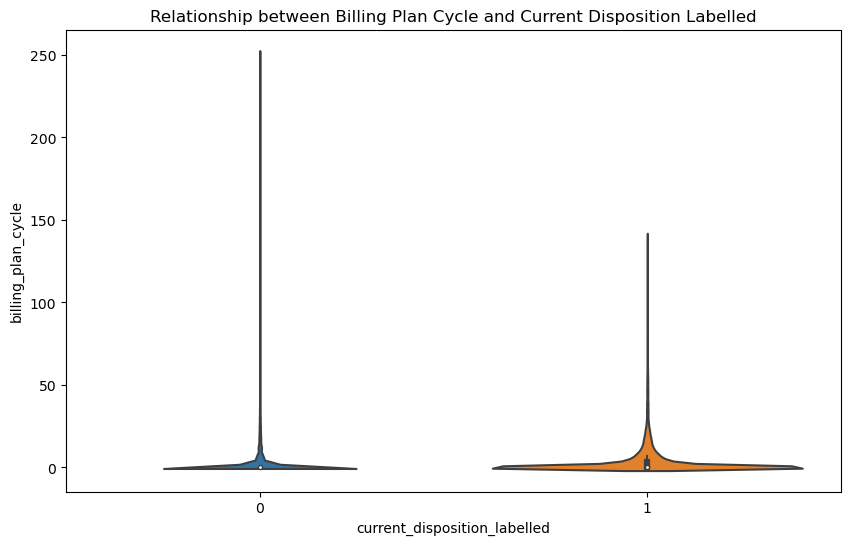

In [31]:
# lets see it in a graph
plt.figure(figsize=(10, 6))
sns.violinplot(x='current_disposition_labelled', y='billing_plan_cycle', data=df)
plt.title('Relationship between Billing Plan Cycle and Current Disposition Labelled')
plt.show()

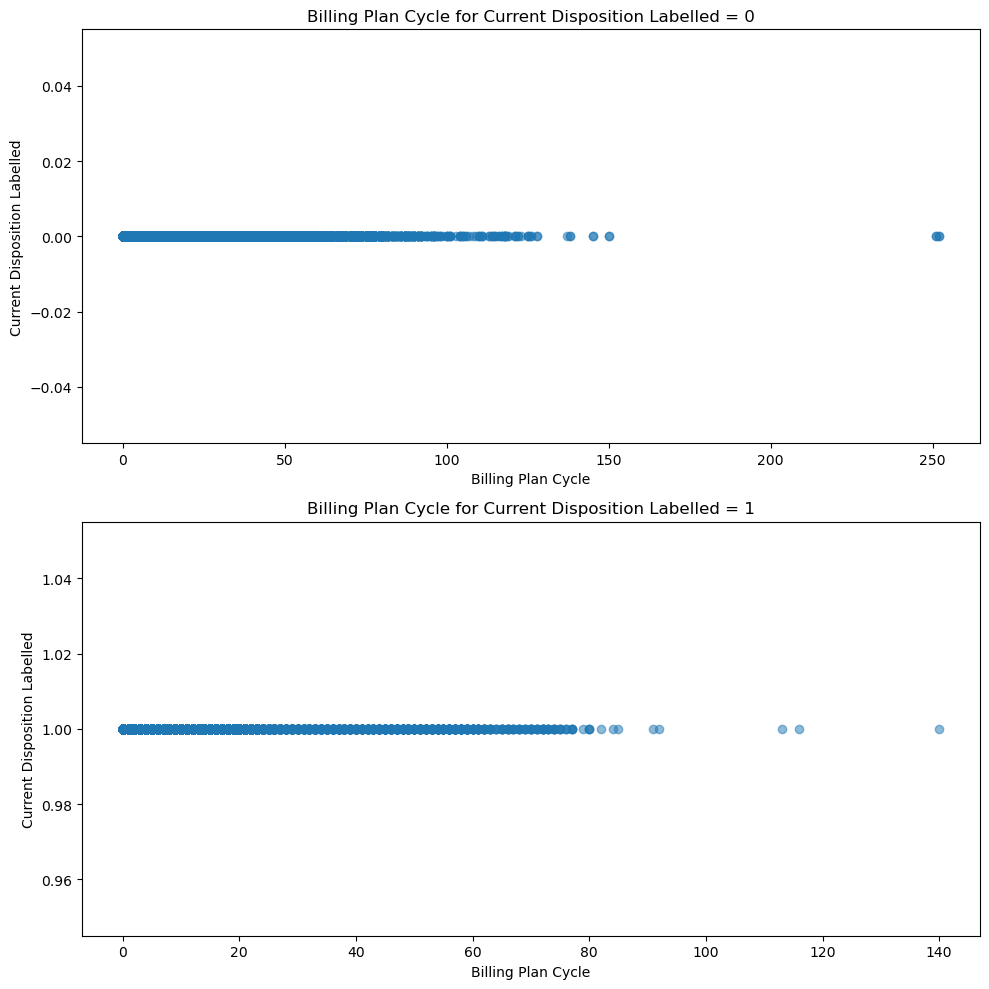

In [32]:
# CREATING A DIFFERENT PLOT

# Create a new DataFrame
df_cleaned = df[['billing_plan_cycle', 'current_disposition_labelled']].dropna()

# Separate data based on 'current_disposition_labelled'
group_0 = df_cleaned[df_cleaned['current_disposition_labelled'] == 0]
group_1 = df_cleaned[df_cleaned['current_disposition_labelled'] == 1]

fig, axs = plt.subplots(2, figsize=(10, 10))

# Plot for 'current_disposition_labelled' == 0
axs[0].scatter(group_0['billing_plan_cycle'], group_0['current_disposition_labelled'], alpha=0.5)
axs[0].set_title('Billing Plan Cycle for Current Disposition Labelled = 0')
axs[0].set_xlabel('Billing Plan Cycle')
axs[0].set_ylabel('Current Disposition Labelled')

# Plot for 'current_disposition_labelled' == 1
axs[1].scatter(group_1['billing_plan_cycle'], group_1['current_disposition_labelled'], alpha=0.5)
axs[1].set_title('Billing Plan Cycle for Current Disposition Labelled = 1')
axs[1].set_xlabel('Billing Plan Cycle')
axs[1].set_ylabel('Current Disposition Labelled')

plt.tight_layout()
plt.show()

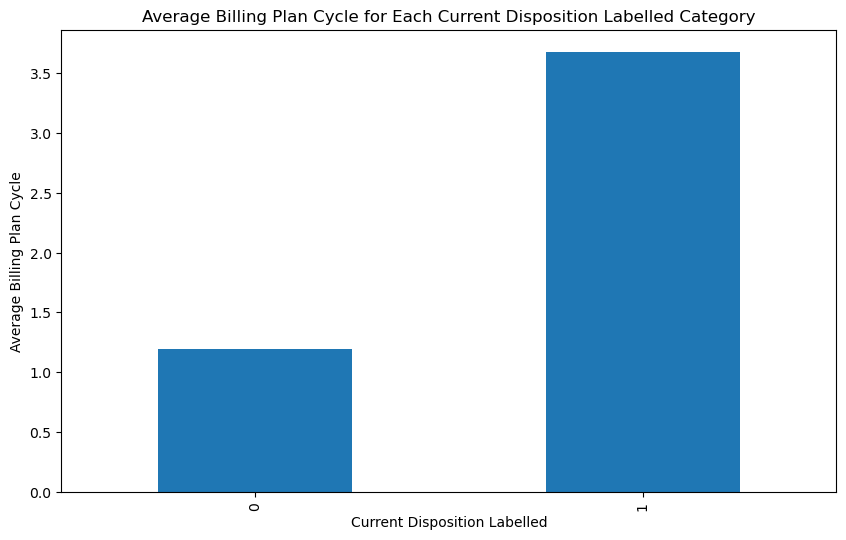

In [33]:
# MEAN PLOT

# Compute the mean 'billing_plan_cycle' for each 'current_disposition_labelled' category
mean_cycle = df.groupby('current_disposition_labelled')['billing_plan_cycle'].mean()

# Plot
mean_cycle.plot(kind='bar', figsize=(10,6))
plt.title('Average Billing Plan Cycle for Each Current Disposition Labelled Category')
plt.xlabel('Current Disposition Labelled')
plt.ylabel('Average Billing Plan Cycle')
plt.show()


In [34]:
# איך זה הגיוני?

 #### 4.E. 'calc_merchant_day_exchange_rate' Correlation 

In [50]:
unique_values = df['calc_merchant_day_exchange_rate'].unique()
print(unique_values)

[1.       0.75815  0.898295 ... 1.394358 1.372325 1.570105]


In [53]:
print(df['calc_merchant_day_exchange_rate'].head(10))

0    1.00000
1    1.00000
2    1.00000
3    1.00000
4    1.00000
5    1.00000
6    1.00000
7    0.75815
8    1.00000
9    1.00000
Name: calc_merchant_day_exchange_rate, dtype: float64


In [54]:
# there is not null so we will calculate regolary

In [55]:
correlation = df[['calc_merchant_day_exchange_rate', 'current_disposition_labelled']].corr()

print(correlation)

                                 calc_merchant_day_exchange_rate  \
calc_merchant_day_exchange_rate                         1.000000   
current_disposition_labelled                            0.005541   

                                 current_disposition_labelled  
calc_merchant_day_exchange_rate                      0.005541  
current_disposition_labelled                         1.000000  


In [56]:
# there is a low corolation of a 0.005541

In [74]:
unique_values = df['payment_provider'].unique()
print(unique_values)

['Unknown' 'Edgil' 'Paymentech' 'PaySafe' 'CyberSource' 'Compass'
 'BrainTree' 'Litle' 'Stripe' 'Orbital' 'AuthorizeNet' 'Ingenico']


In [73]:
print(df['billing_plan_cycle'].head(10))

0    NaN
1    NaN
2    NaN
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: billing_plan_cycle, dtype: float64


###  5.Testing categorical variables 

 #### 5.A. 'Payment Provider' 

In [123]:
print(df['payment_provider'].head(10))

0        Unknown
1        Unknown
2        Unknown
3        Unknown
4          Edgil
5     Paymentech
6     Paymentech
7        PaySafe
8          Edgil
9    CyberSource
Name: payment_provider, dtype: object


In [78]:
unique_values = df['payment_provider'].unique()
print(unique_values)

['Unknown' 'Edgil' 'Paymentech' 'PaySafe' 'CyberSource' 'Compass'
 'BrainTree' 'Litle' 'Stripe' 'Orbital' 'AuthorizeNet' 'Ingenico']


In [79]:
#Creating a Bar Plot

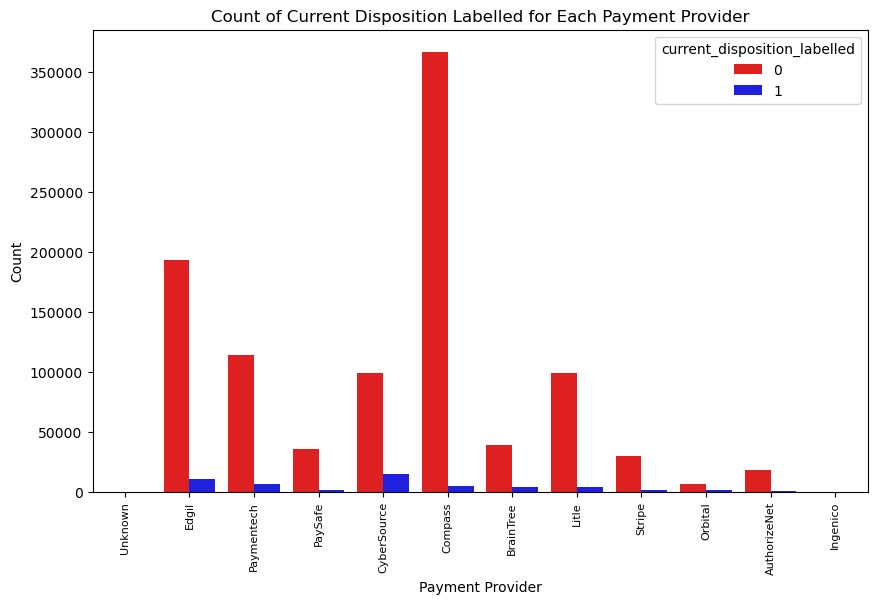

In [81]:
 # Specify the figure size
plt.figure(figsize=(10, 6))

# Define the color palette
palette = {0: "red", 1: "blue"}

# Create the countplot
sns.countplot(x='payment_provider', hue='current_disposition_labelled', data=df, palette=palette)

# Add title and labels
plt.title('Count of Current Disposition Labelled for Each Payment Provider')
plt.xlabel('Payment Provider')
plt.ylabel('Count')

# Adjust the x-axis labels
plt.xticks(rotation=90, fontsize=8)

# Display the plot
plt.show()

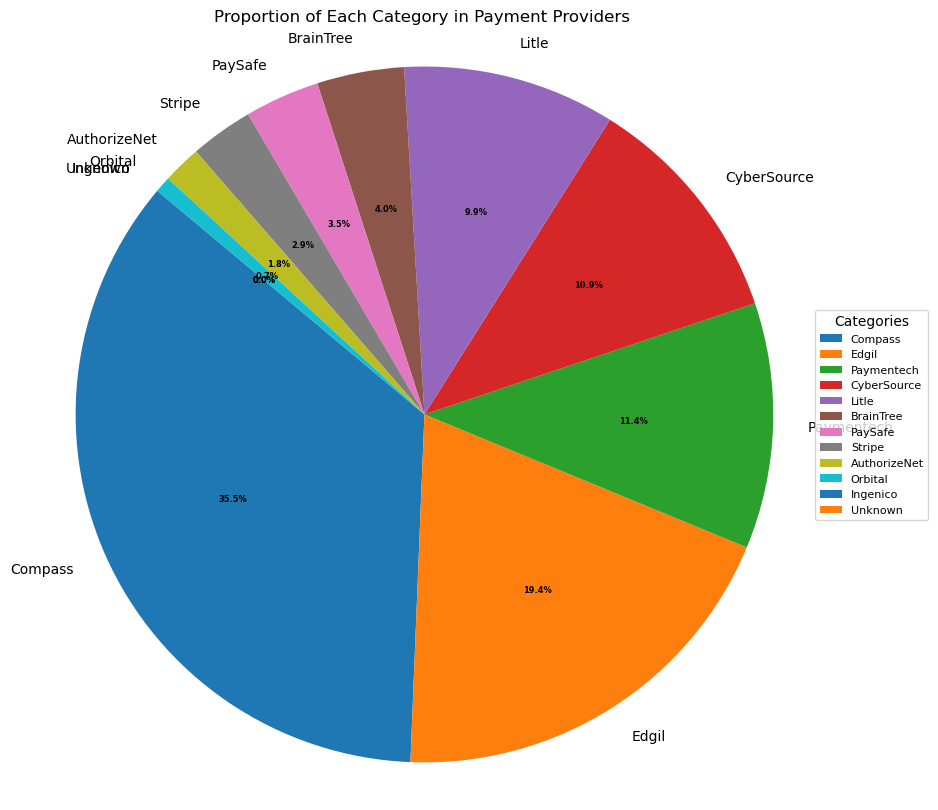

In [122]:
# Create a copy of the dataframe
df_copy = df.copy()

# Drop nan entries in 'payment_provider'
df_copy = df_copy[df_copy['payment_provider'].notna()]

# Calculate the proportions of each category
proportions = df_copy['payment_provider'].value_counts(normalize=True)

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=140)

# Draw a legend with smaller fontsize
ax.legend(wedges, proportions.index,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=8)  # Smaller fontsize for the legend

# Make the percentage labels smaller
plt.setp(autotexts, size=6, weight="bold")  # Smaller fontsize for the percentage labels

ax.set_title('Proportion of Each Category in Payment Providers')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Display the plot
plt.show()



Compass, Edgil, Paymentech are top 3


 #### 5.B. 'payment_method_id' 

In [83]:
print(df['payment_method_id'].head(20))


0     737845699
1     734304000
2     716672673
3     715447380
4     759752453
5     616078457
6     740813176
7     713417058
8     689725417
9     680232982
10    616536034
11    708815050
12    717645573
13    738608760
14    697879741
15    743657982
16    737977062
17    736684405
18    678441653
19    740592883
Name: payment_method_id, dtype: int64


In [84]:
unique_values = df['payment_method_id'].unique()

In [85]:
# we will take top15 

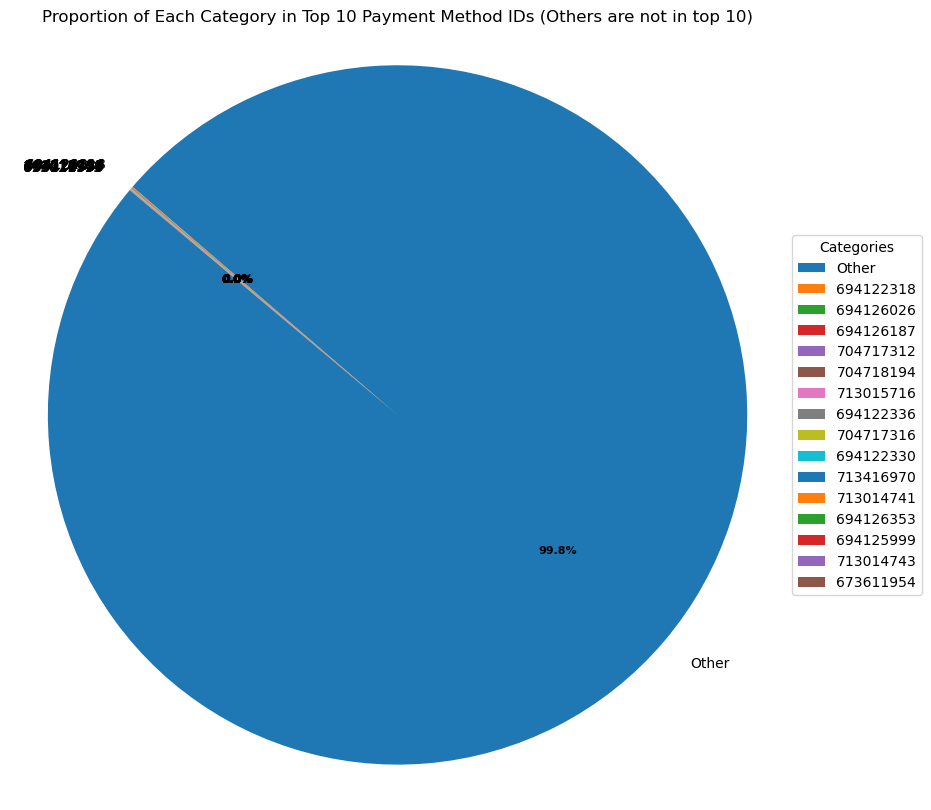

In [90]:

# Get the top 15 categories by count
top_15 = df['payment_method_id'].value_counts().index[:15]

# Create a new column 'payment_method_id_top_10' where categories not in top_10 are labeled as 'Other'
df['payment_method_id_top_15'] = df['payment_method_id'].apply(lambda x: x if x in top_15 else 'Other')

# Calculate the proportions of each category
proportions = df['payment_method_id_top_15'].value_counts(normalize=True)

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=140)

# Draw a legend
ax.legend(wedges, proportions.index,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
ax.set_title('Proportion of Each Category in Top 10 Payment Method IDs (Others are not in top 10)')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Display the plot
plt.show()


In [ ]:
# the main ting to test so we will check:    credit_card_type    
# wich represent credit card or debit cards

 #### 5.C. 'credit_card_type' 

In [88]:
print(df['credit_card_type'].head(10))

0       NaN
1       NaN
2       NaN
3       NaN
4     DEBIT
5    CREDIT
6     DEBIT
7     DEBIT
8       NaN
9    CREDIT
Name: credit_card_type, dtype: object


In [89]:
unique_values = df['credit_card_type'].unique()
print(unique_values)

[nan 'DEBIT' 'CREDIT' 'CHARGE CARD']


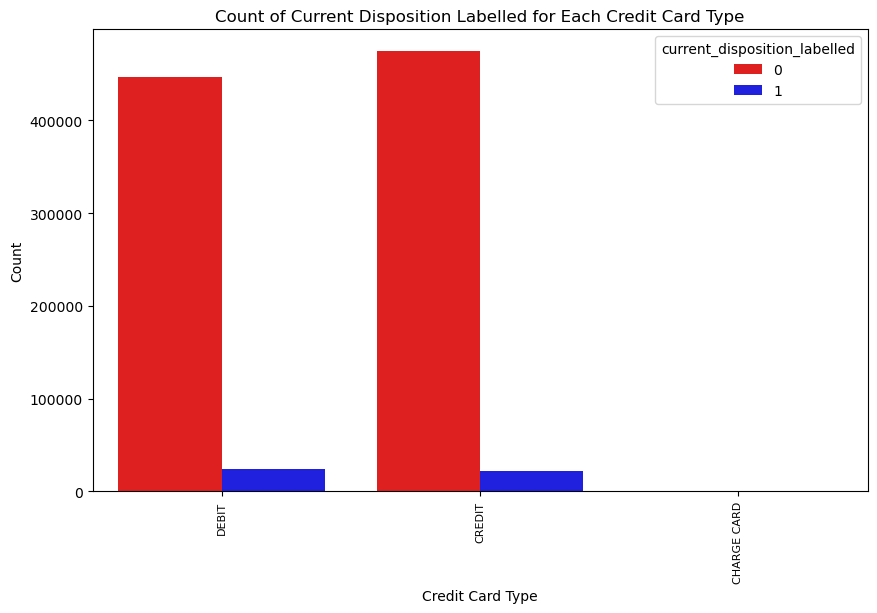

In [91]:
# Create a copy of the dataframe
df_copy = df.copy()

# Drop rows with null 'credit_card_type'
df_copy.dropna(subset=['credit_card_type'], inplace=True)

# Specify the figure size
plt.figure(figsize=(10, 6))

# Define the color palette
palette = {0: "red", 1: "blue"}

# Create the countplot
sns.countplot(x='credit_card_type', hue='current_disposition_labelled', data=df_copy, palette=palette)

# Add title and labels
plt.title('Count of Current Disposition Labelled for Each Credit Card Type')
plt.xlabel('Credit Card Type')
plt.ylabel('Count')

# Adjust the x-axis labels
plt.xticks(rotation=90, fontsize=8)

# Display the plot
plt.show()


In [92]:
# Observation: 'CREDIT' and 'DEBIT' are most common. 'CREDIT' appears a bit more than 'DEBIT'. Next step, calculate the percentage of each category.


In [93]:

# Get counts of each category
counts = df['credit_card_type'].value_counts(dropna=False)

# Print counts
print("Counts:")
print(counts)

# Get percentages
percentages = df['credit_card_type'].value_counts(dropna=False, normalize=True) * 100

# Print percentages
print("\nPercentages:")
print(percentages)


Counts:
CREDIT         496879
DEBIT          470289
NaN             81241
CHARGE CARD       166
Name: credit_card_type, dtype: int64

Percentages:
CREDIT         47.386119
DEBIT          44.850297
NaN             7.747753
CHARGE CARD     0.015831
Name: credit_card_type, dtype: float64


 #### 5.D. 'credit_card_bin' 

In [95]:
print(df['credit_card_bin'].head(10))

0         NaN
1         NaN
2         NaN
3         NaN
4    474477.0
5    521333.0
6    550633.0
7    446291.0
8         NaN
9    545198.0
Name: credit_card_bin, dtype: float64


In [99]:
unique_values = df['credit_card_bin'].unique()
print(unique_values)


[    nan 474477. 521333. ... 378430. 456072. 514972.]


In [100]:
# there are too meny types will consider using  pie chart with top vars

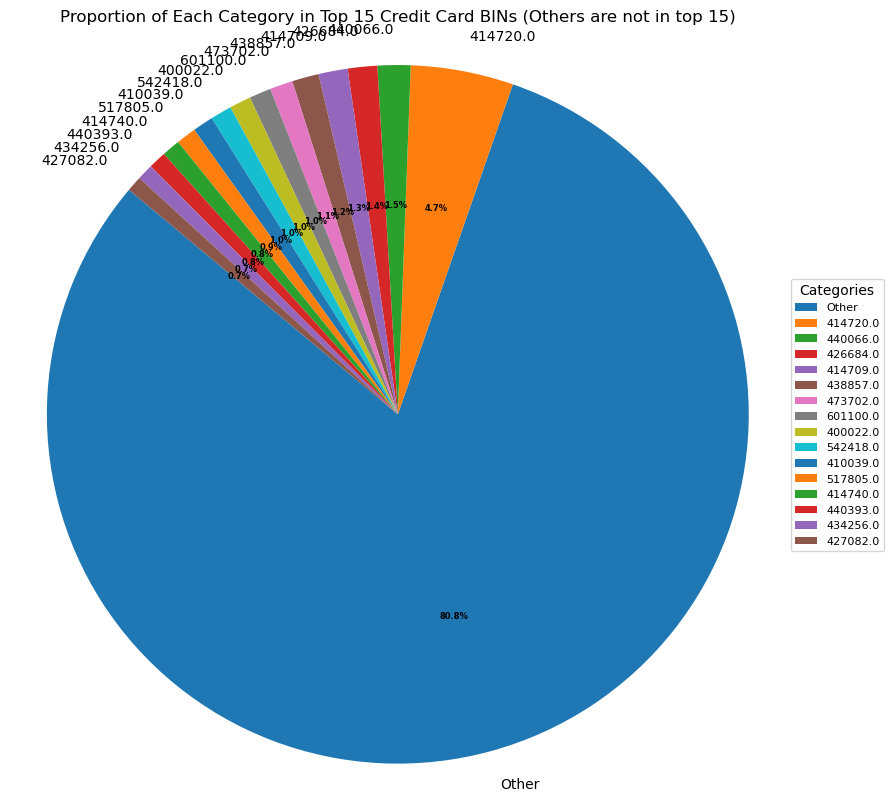

In [102]:
 # Create a copy of the dataframe
df_copy = df.copy()

# Drop nan entries in 'credit_card_bin'
df_copy = df_copy[df_copy['credit_card_bin'].notna()]

# Get the top 15 categories by count
top_15 = df_copy['credit_card_bin'].value_counts().index[:15]

# Create a new column 'credit_card_bin_top_15' where categories not in top_15 are labeled as 'Other'
df_copy['credit_card_bin_top_15'] = df_copy['credit_card_bin'].apply(lambda x: x if x in top_15 else 'Other')

# Calculate the proportions of each category
proportions = df_copy['credit_card_bin_top_15'].value_counts(normalize=True)

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=140)

# Draw a legend with smaller fontsize
ax.legend(wedges, proportions.index,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=8)  # Smaller fontsize for the legend

# Make the percentage labels smaller
plt.setp(autotexts, size=6, weight="bold")  # Smaller fontsize for the percentage labels

ax.set_title('Proportion of Each Category in Top 15 Credit Card BINs (Others are not in top 15)')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Display the plot
plt.show()


In [ ]:
# top 3 AMOUNT
#414720,
#440066,
#426684


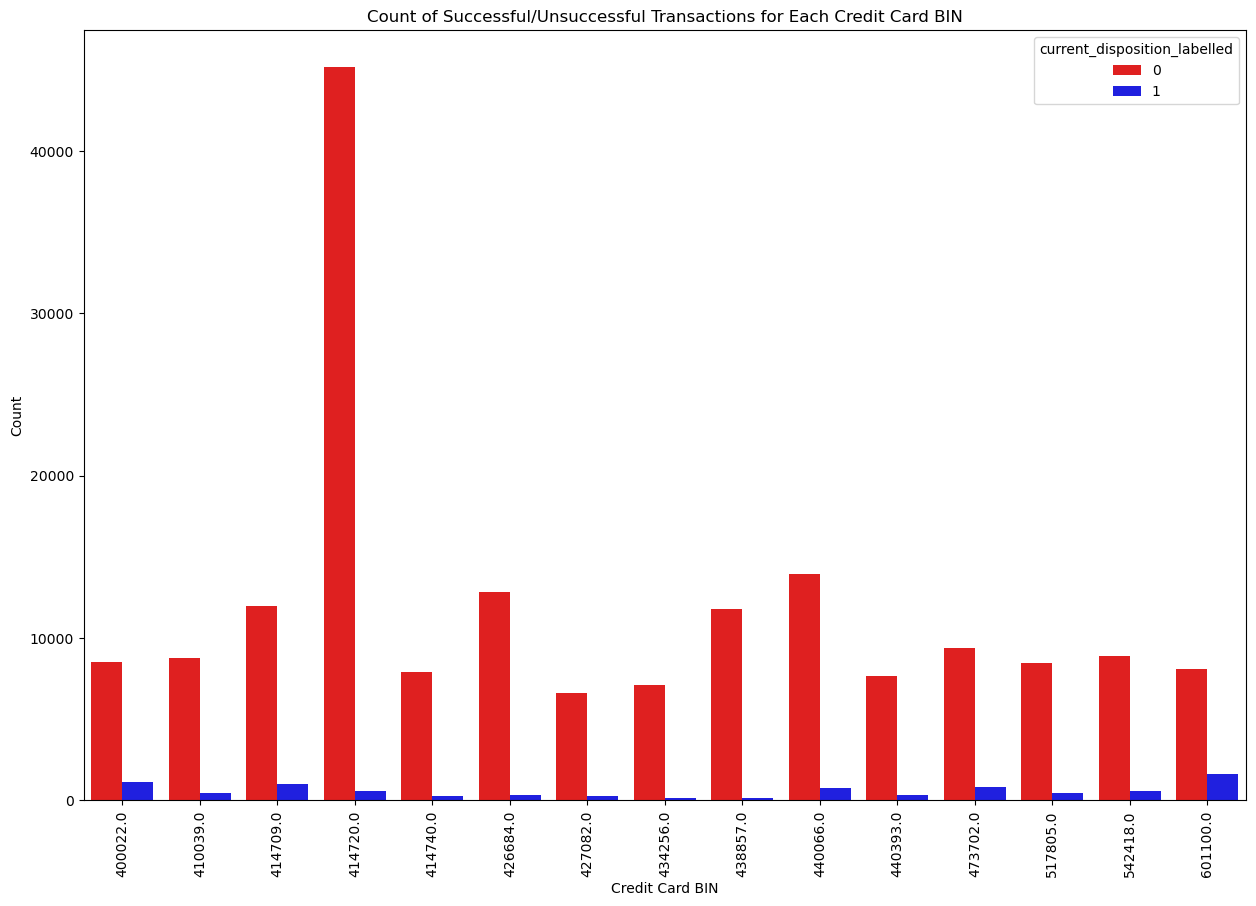

In [110]:
# Create a copy of the dataframe
df_copy = df.copy()

# Drop nan entries in 'credit_card_bin'
df_copy = df_copy[df_copy['credit_card_bin'].notna()]

# Get the top 15 categories by count
top_15 = df_copy['credit_card_bin'].value_counts().index[:15]

# Filter the dataframe to include only top 15 categories
df_copy = df_copy[df_copy['credit_card_bin'].isin(top_15)]

# Define the color palette
palette = {0: "red", 1: "blue"}

# Create a grouped bar chart
plt.figure(figsize=(15, 10))
sns.countplot(x='credit_card_bin', hue='current_disposition_labelled', data=df_copy, palette=palette)

# Add title and labels
plt.title('Count of Successful/Unsuccessful Transactions for Each Credit Card BIN')
plt.xlabel('Credit Card BIN')
plt.ylabel('Count')

# Adjust the x-axis labels
plt.xticks(rotation=90)

# Display the plot
plt.show()


In [111]:
# top 3 '0'
#414720,
#440066,
#426684

 #### 5.E. 'credit_card_brand' 

In [103]:
print(df['credit_card_brand'].head(10))

0           NaN
1           NaN
2           NaN
3           NaN
4          VISA
5    MASTERCARD
6    MASTERCARD
7          VISA
8           NaN
9    MASTERCARD
Name: credit_card_brand, dtype: object


In [105]:
unique_values = df['credit_card_brand'].unique()
print(unique_values)

[nan 'VISA' 'MASTERCARD' 'AMERICAN EXPRESS' 'DISCOVER' 'VISA/DANKORT'
 'EBT' 'NSPK MIR' 'CIRRUS' 'JCB' 'FUEL CARD' 'MAESTRO' 'CHINA UNION PAY'
 'ELO' 'DINERS CLUB INTERNATIONAL' 'PRIVATE LABEL' 'RUPAY' 'VERVE']


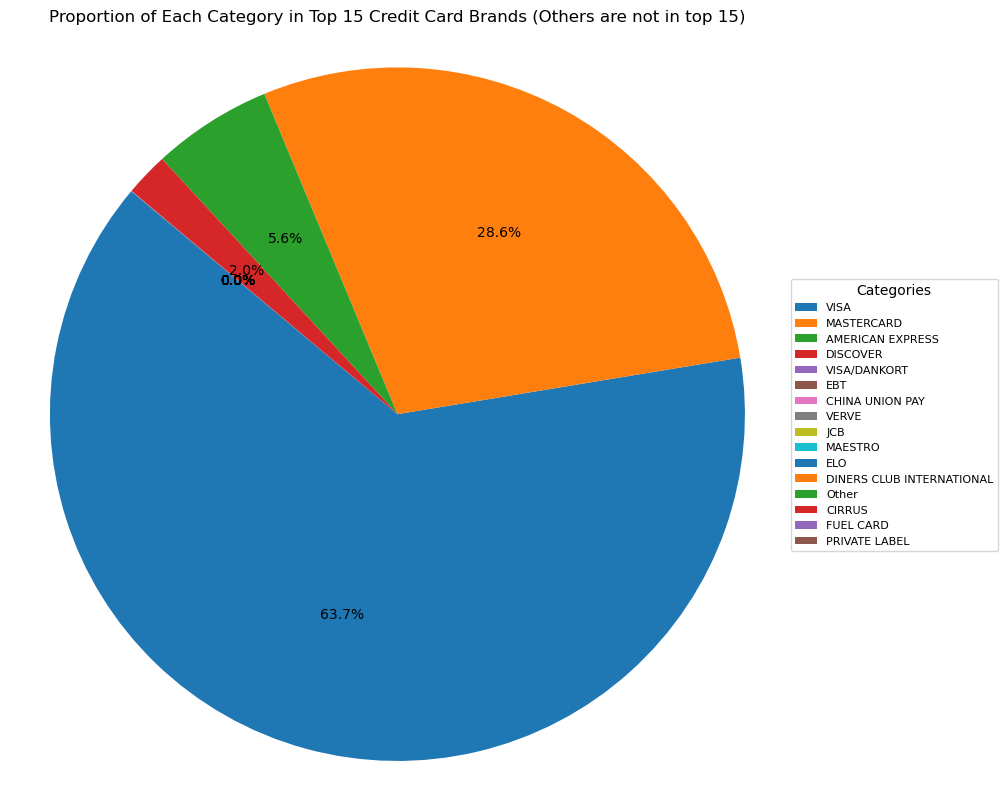

In [107]:
# Create a copy of the dataframe
df_copy = df.copy()

# Drop nan entries in 'credit_card_brand'
df_copy = df_copy[df_copy['credit_card_brand'].notna()]

# Get the top 15 categories by count
top_15 = df_copy['credit_card_brand'].value_counts().index[:15]

# Create a new column 'credit_card_brand_top_15' where categories not in top_15 are labeled as 'Other'
df_copy['credit_card_brand_top_15'] = df_copy['credit_card_brand'].apply(lambda x: x if x in top_15 else 'Other')

# Calculate the proportions of each category
proportions = df_copy['credit_card_brand_top_15'].value_counts(normalize=True)

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(proportions, autopct='%1.1f%%', startangle=140)

# Draw a legend with smaller fontsize
ax.legend(wedges, proportions.index,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=8)  # Smaller fontsize for the legend

ax.set_title('Proportion of Each Category in Top 15 Credit Card Brands (Others are not in top 15)')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Display the plot
plt.show()


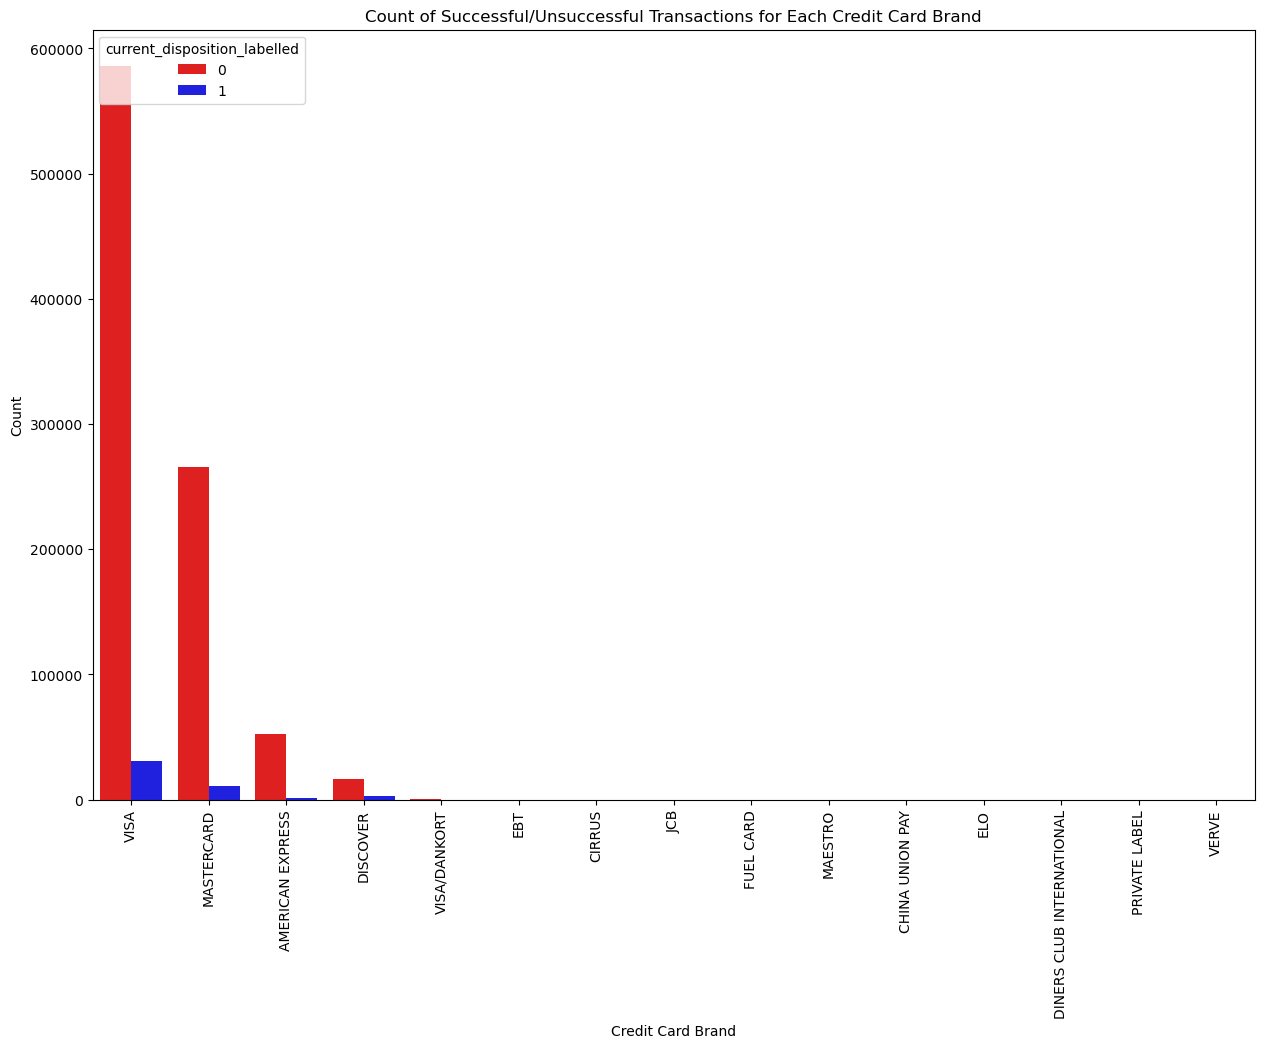

In [109]:
# Create a copy of the dataframe
df_copy = df.copy()

# Drop nan entries in 'credit_card_brand'
df_copy = df_copy[df_copy['credit_card_brand'].notna()]

# Get the top 15 categories by count
top_15 = df_copy['credit_card_brand'].value_counts().index[:15]

# Filter the dataframe to include only top 15 categories
df_copy = df_copy[df_copy['credit_card_brand'].isin(top_15)]

# Define the color palette
palette = {0: "red", 1: "blue"}

# Create a grouped bar chart
plt.figure(figsize=(15, 10))
sns.countplot(x='credit_card_brand', hue='current_disposition_labelled', data=df_copy, palette=palette)

# Add title and labels
plt.title('Count of Successful/Unsuccessful Transactions for Each Credit Card Brand')
plt.xlabel('Credit Card Brand')
plt.ylabel('Count')

# Adjust the x-axis labels
plt.xticks(rotation=90)

# Display the plot
plt.show()


 #### 5.F. ''credit_card_issuing_bank'' 

In [112]:
print(df['credit_card_issuing_bank'].head(10))

0                                      NaN
1                                      NaN
2                                      NaN
3                                      NaN
4    BANK OF AMERICA, NATIONAL ASSOCIATION
5                           SYNCHRONY BANK
6       CITIZENS EQUITY FIRST CREDIT UNION
7                              HALIFAX PLC
8                                      NaN
9      HSBC BANK USA, NATIONAL ASSOCIATION
Name: credit_card_issuing_bank, dtype: object


In [114]:
unique_values = df['credit_card_issuing_bank'].unique()
print(unique_values)

[nan 'BANK OF AMERICA, NATIONAL ASSOCIATION' 'SYNCHRONY BANK' ...
 'DOGIN CARD CO., LTD.' 'ERSTE & STEIERMARKISCHE BANK D.D.'
 'NATIONAL BANK OF KUWAIT (S A K )']


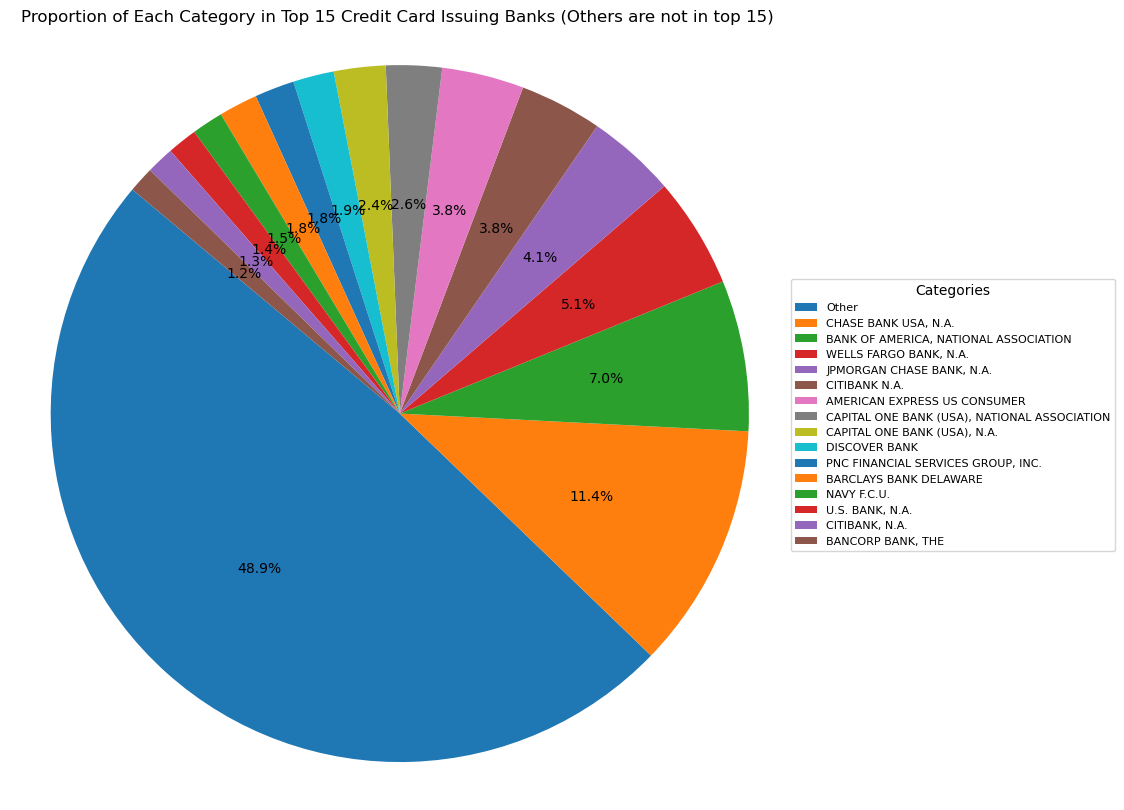

In [115]:
# Create a copy of the dataframe
df_copy = df.copy()

# Drop nan entries in 'credit_card_issuing_bank'
df_copy = df_copy[df_copy['credit_card_issuing_bank'].notna()]

# Get the top 15 categories by count
top_15 = df_copy['credit_card_issuing_bank'].value_counts().index[:15]

# Create a new column 'credit_card_issuing_bank_top_15' where categories not in top_15 are labeled as 'Other'
df_copy['credit_card_issuing_bank_top_15'] = df_copy['credit_card_issuing_bank'].apply(lambda x: x if x in top_15 else 'Other')

# Calculate the proportions of each category
proportions = df_copy['credit_card_issuing_bank_top_15'].value_counts(normalize=True)

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(proportions, autopct='%1.1f%%', startangle=140)

# Draw a legend with smaller fontsize
ax.legend(wedges, proportions.index,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=8)  # Smaller fontsize for the legend

ax.set_title('Proportion of Each Category in Top 15 Credit Card Issuing Banks (Others are not in top 15)')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Display the plot
plt.show()


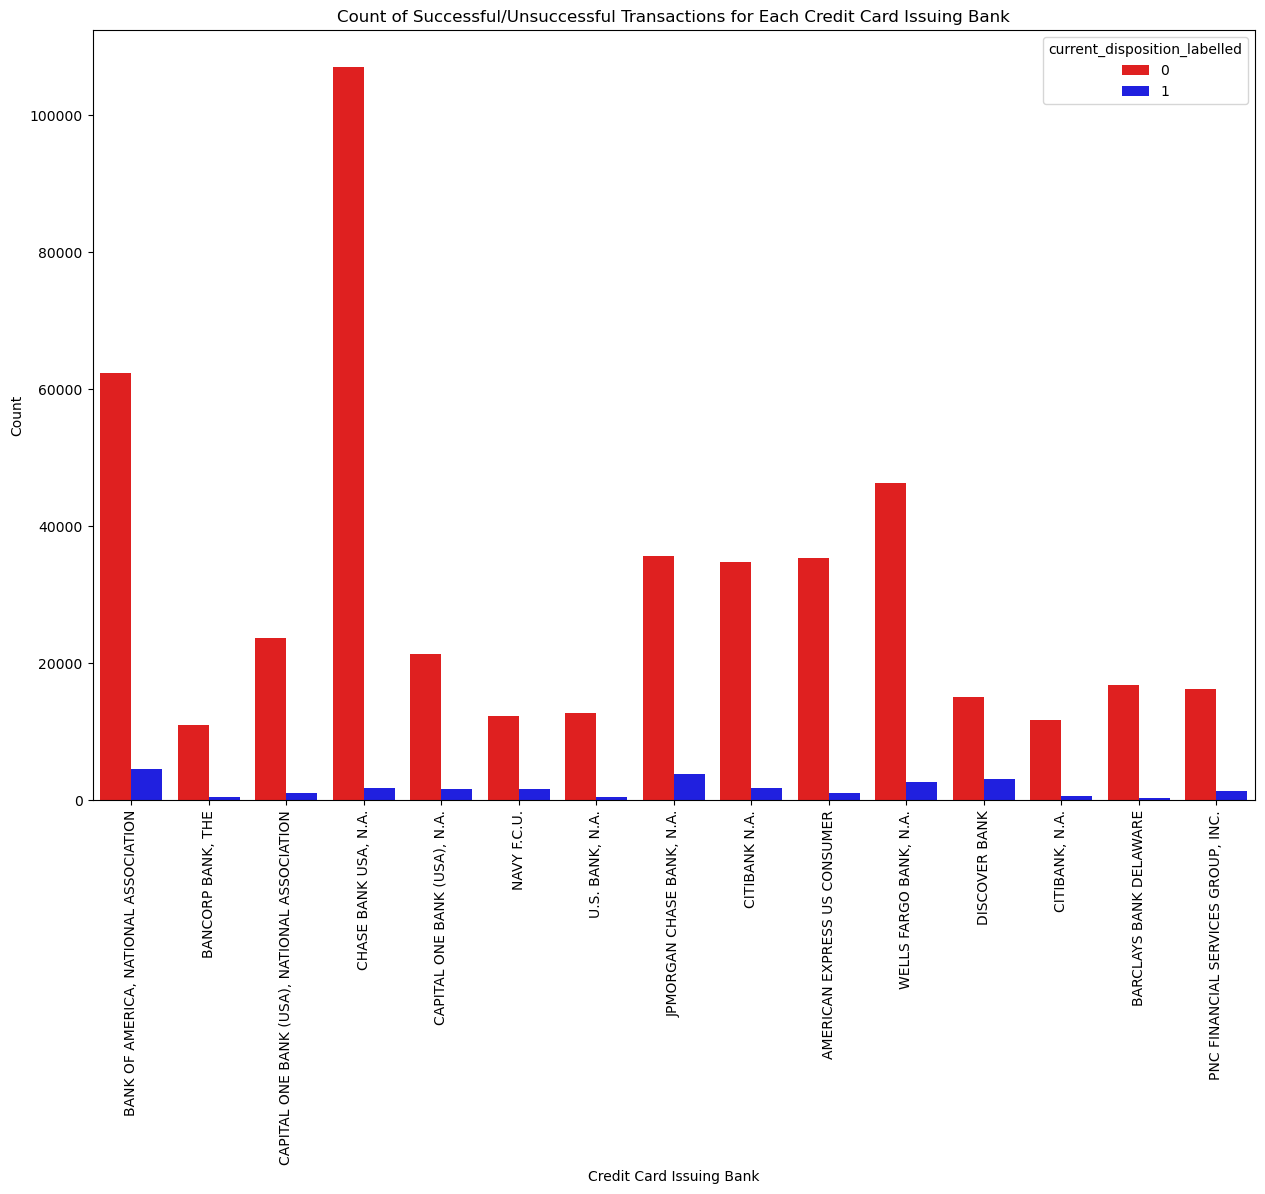

In [128]:
# Create a copy of the dataframe
df_copy = df.copy()

# Drop nan entries in 'credit_card_issuing_bank'
df_copy = df_copy[df_copy['credit_card_issuing_bank'].notna()]

# Get the top 15 categories by count
top_15 = df_copy['credit_card_issuing_bank'].value_counts().index[:15]

# Filter the dataframe to include only top 15 categories
df_copy = df_copy[df_copy['credit_card_issuing_bank'].isin(top_15)]

# Define the color palette
palette = {0: "red", 1: "blue"}

# Create a grouped bar chart
plt.figure(figsize=(15, 10))
sns.countplot(x='credit_card_issuing_bank', hue='current_disposition_labelled', data=df_copy, palette=palette)

# Add title and labels
plt.title('Count of Successful/Unsuccessful Transactions for Each Credit Card Issuing Bank')
plt.xlabel('Credit Card Issuing Bank')
plt.ylabel('Count')

# Adjust the x-axis labels
plt.xticks(rotation=90)

# Display the plot
plt.show()


 #### 5.G. 'credit_card_issuing_bank_country' 

credit_card_issuing_bank_country  

In [132]:
print(df['credit_card_issuing_bank_country'].head(10))

0               NaN
1               NaN
2               NaN
3               NaN
4     UNITED STATES
5     UNITED STATES
6     UNITED STATES
7    UNITED KINGDOM
8               NaN
9     UNITED STATES
Name: credit_card_issuing_bank_country, dtype: object


In [133]:
unique_values = df['credit_card_issuing_bank_country'].unique()
print(unique_values)

[nan 'UNITED STATES' 'UNITED KINGDOM' 'INDIA' 'ZAMBIA' 'ECUADOR' 'BELGIUM'
 'CANADA' 'FRANCE' 'GHANA' 'IRAQ' 'SWITZERLAND' 'POLAND' 'HONG KONG'
 'SPAIN' 'NEW ZEALAND' 'PANAMA' 'CAMEROON' 'ITALY' 'NETHERLANDS'
 'INDONESIA' 'ANTIGUA AND BARBUDA' 'PUERTO RICO' 'IRELAND' 'SINGAPORE'
 'UKRAINE' 'AUSTRALIA' 'MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF'
 'RUSSIAN FEDERATION' 'MEXICO' 'EGYPT' 'VIET NAM' 'GERMANY' 'GREECE'
 'SAUDI ARABIA' 'CAYMAN ISLANDS' 'LEBANON' 'SOUTH AFRICA' 'SLOVENIA'
 'CHINA' 'SWEDEN' 'SERBIA' 'PHILIPPINES' 'JORDAN' 'DOMINICAN REPUBLIC'
 'TURKEY' 'SAINT KITTS AND NEVIS' 'NORWAY' 'UNITED ARAB EMIRATES'
 'AUSTRIA' 'CYPRUS' 'NIGERIA' 'BAHRAIN' 'MALAYSIA' 'KENYA' 'PAKISTAN'
 'BURKINA FASO' 'JAPAN' 'GUATEMALA' 'FINLAND' 'KOREA, REPUBLIC OF'
 'ICELAND' 'COSTA RICA' 'HONDURAS' 'UGANDA' 'BULGARIA' 'QATAR' 'DENMARK'
 'BRAZIL' 'HUNGARY' 'GUAM' 'THAILAND' 'MOROCCO' 'LUXEMBOURG'
 'TAIWAN, PROVINCE OF CHINA' 'SLOVAKIA' 'OMAN'
 'BOLIVIA, PLURINATIONAL STATE OF' 'TANZANIA, UNITED REPUBL

In [134]:
# we will  pick top 15

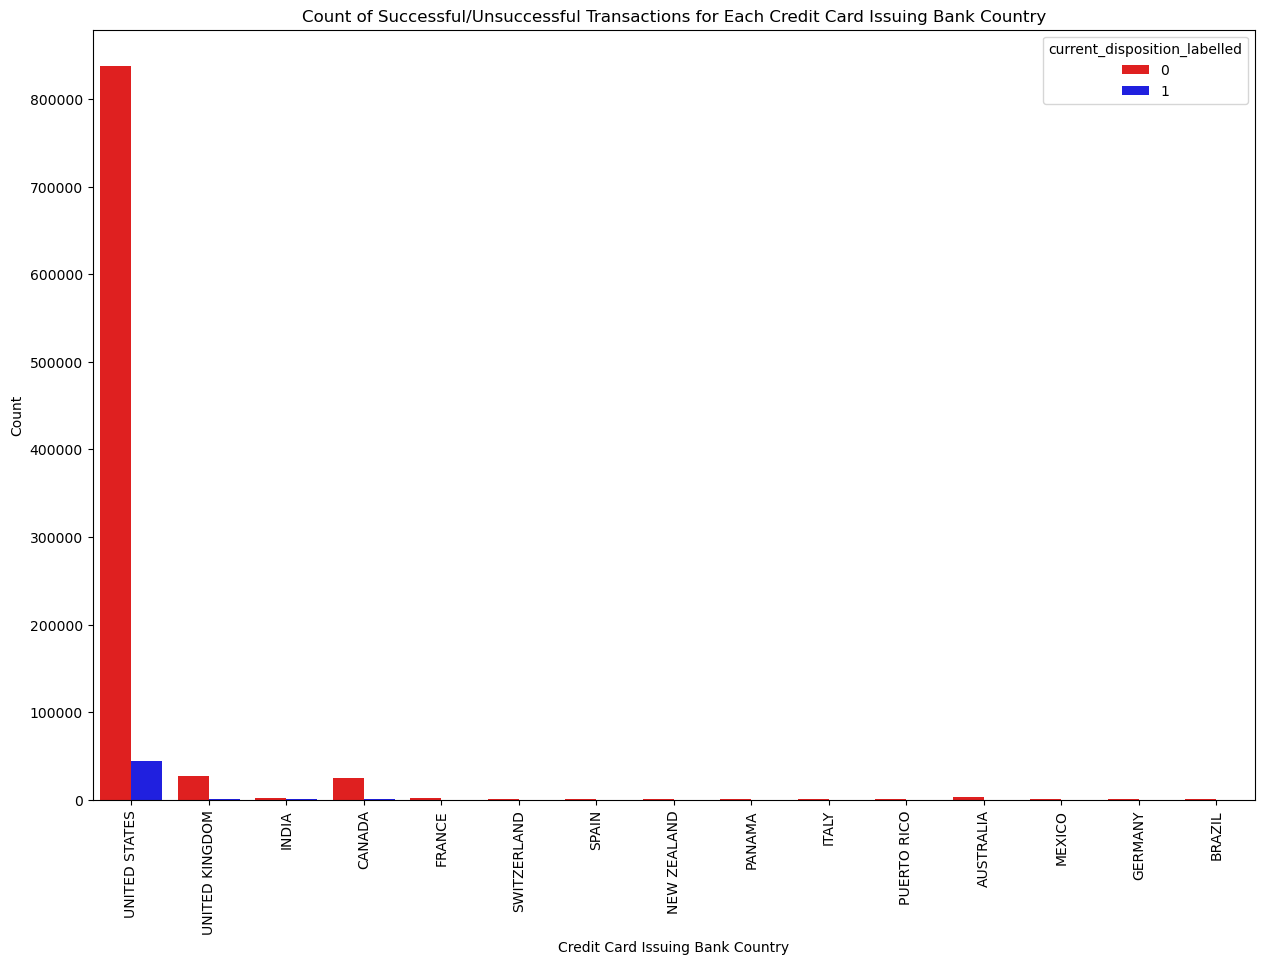

In [135]:
# Create a copy of the dataframe
df_copy = df.copy()

# Drop nan entries in 'credit_card_issuing_bank_country'
df_copy = df_copy[df_copy['credit_card_issuing_bank_country'].notna()]

# Get the top 15 categories by count
top_15 = df_copy['credit_card_issuing_bank_country'].value_counts().index[:15]

# Filter the dataframe to include only top 15 categories
df_copy = df_copy[df_copy['credit_card_issuing_bank_country'].isin(top_15)]

# Define the color palette
palette = {0: "red", 1: "blue"}

# Create a grouped bar chart
plt.figure(figsize=(15, 10))
sns.countplot(x='credit_card_issuing_bank_country', hue='current_disposition_labelled', data=df_copy, palette=palette)

# Add title and labels
plt.title('Count of Successful/Unsuccessful Transactions for Each Credit Card Issuing Bank Country')
plt.xlabel('Credit Card Issuing Bank Country')
plt.ylabel('Count')

# Adjust the x-axis labels
plt.xticks(rotation=90)

# Display the plot
plt.show()


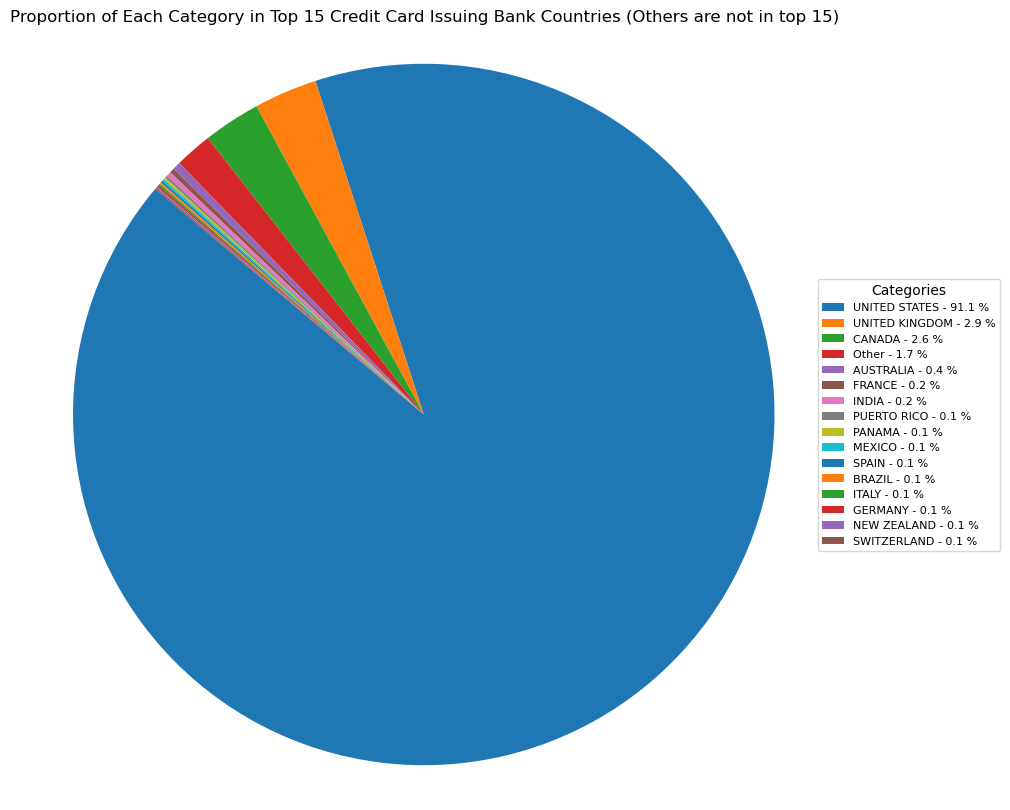

In [142]:
# Create a copy of the dataframe
df_copy = df.copy()

# Drop nan entries in 'credit_card_issuing_bank_country'
df_copy = df_copy[df_copy['credit_card_issuing_bank_country'].notna()]

# Get the top 15 categories by count
top_15 = df_copy['credit_card_issuing_bank_country'].value_counts().index[:15]

# Create a new column 'credit_card_issuing_bank_country_top_15' where categories not in top_15 are labeled as 'Other'
df_copy['credit_card_issuing_bank_country_top_15'] = df_copy['credit_card_issuing_bank_country'].apply(lambda x: x if x in top_15 else 'Other')

# Calculate the proportions of each category
proportions = df_copy['credit_card_issuing_bank_country_top_15'].value_counts(normalize=True)

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts = ax.pie(proportions, startangle=140)

# Draw a legend with smaller fontsize
legend_labels = ['{0} - {1:1.1f} %'.format(i,j*100) for i,j in zip(proportions.index, proportions)]
ax.legend(wedges, legend_labels,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=8)  # Smaller fontsize for the legend

ax.set_title('Proportion of Each Category in Top 15 Credit Card Issuing Bank Countries (Others are not in top 15)')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Display the plot
plt.show()


#### 5.H. '' currency_alphabetic_code'' 

In [143]:
print(df['currency_alphabetic_code'].head(10))

0    USD
1    USD
2    USD
3    USD
4    USD
5    USD
6    USD
7    GBP
8    USD
9    USD
Name: currency_alphabetic_code, dtype: object


In [144]:
unique_values = df['currency_alphabetic_code'].unique()
print(unique_values)

['USD' 'GBP' 'EUR' 'CAD' 'NZD' 'AUD' 'MXN' 'ZAR']


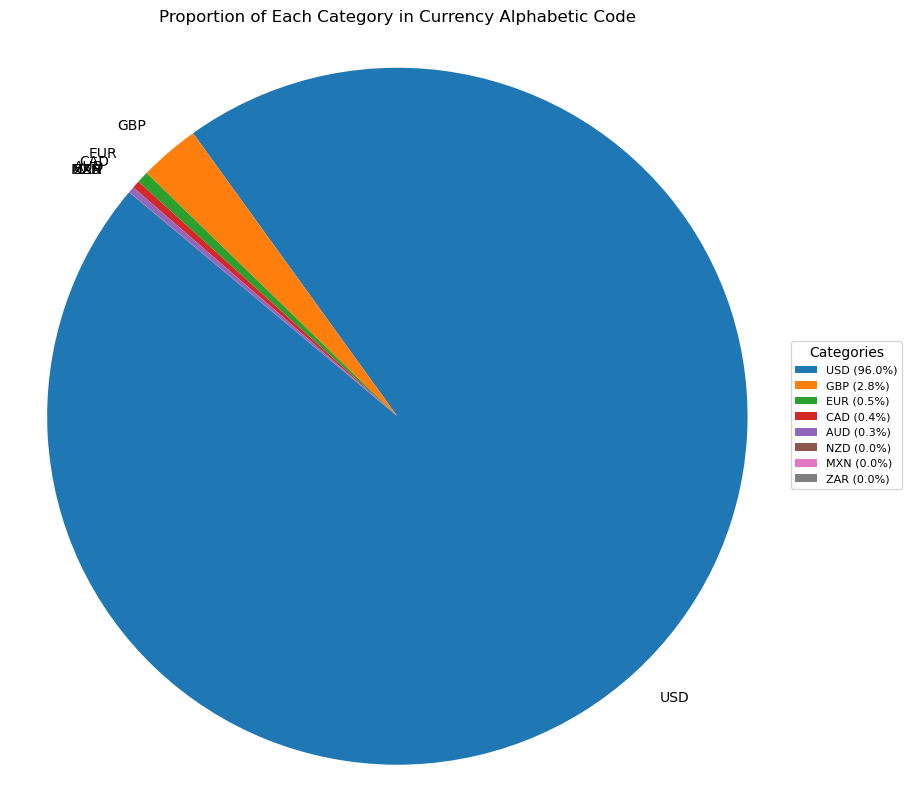

In [151]:
# Create a copy of the dataframe
df_copy = df.copy()

# Drop nan entries in 'currency_alphabetic_code'
df_copy = df_copy[df_copy['currency_alphabetic_code'].notna()]

# Calculate the proportions of each category
proportions = df_copy['currency_alphabetic_code'].value_counts(normalize=True)

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(proportions, labels=proportions.index, autopct='', startangle=140)

# Draw a legend with smaller fontsize
ax.legend(wedges, [f'{i} ({j:.1f}%)' for i, j in zip(proportions.index, proportions*100)],
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=8)  # Smaller fontsize for the legend

ax.set_title('Proportion of Each Category in Currency Alphabetic Code')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Display the plot
plt.show()


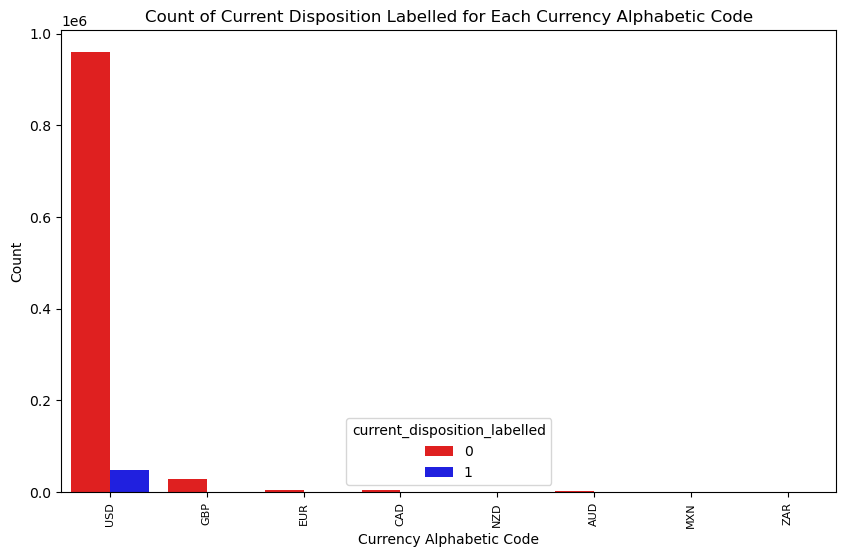

In [153]:
# Specify the figure size
plt.figure(figsize=(10, 6))

# Define the color palette
palette = {0: "red", 1: "blue"}

# Create the countplot
sns.countplot(x='currency_alphabetic_code', hue='current_disposition_labelled', data=df, palette=palette)

# Add title and labels
plt.title('Count of Current Disposition Labelled for Each Currency Alphabetic Code')
plt.xlabel('Currency Alphabetic Code')
plt.ylabel('Count')

# Adjust the x-axis labels
plt.xticks(rotation=90, fontsize=8)

# Display the plot
plt.show()


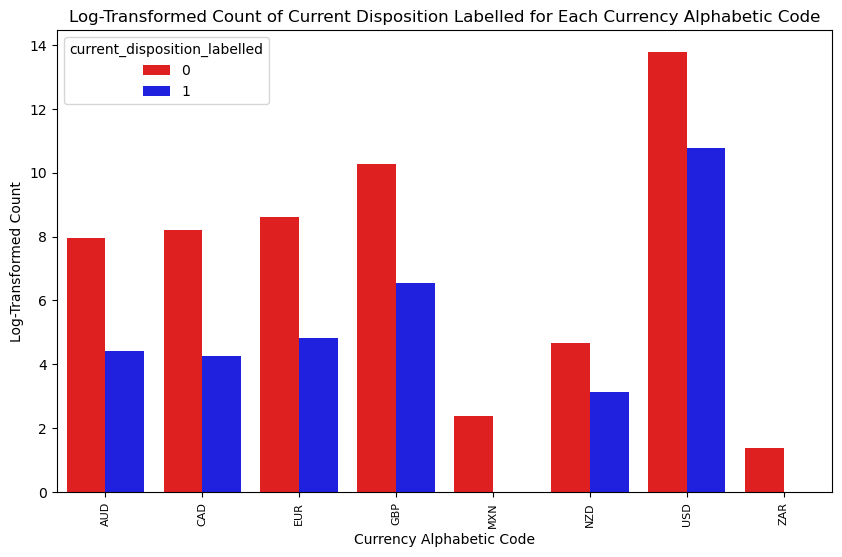

In [152]:
# we can show with log - since the usd is so hight

# Specify the figure size
plt.figure(figsize=(10, 6))

# Define the color palette
palette = {0: "red", 1: "blue"}

# Create a new dataframe with log-transformed counts
df_log = df.groupby(['currency_alphabetic_code', 'current_disposition_labelled']).size().apply(np.log).reset_index(name='counts')

# Create the countplot
sns.barplot(x='currency_alphabetic_code', y='counts', hue='current_disposition_labelled', data=df_log, palette=palette)

# Add title and labels
plt.title('Log-Transformed Count of Current Disposition Labelled for Each Currency Alphabetic Code')
plt.xlabel('Currency Alphabetic Code')
plt.ylabel('Log-Transformed Count')

# Adjust the x-axis labels
plt.xticks(rotation=90, fontsize=8)

# Display the plot
plt.show()


In [147]:
print(df['current_disposition_labelled'].value_counts())
print(df['currency_alphabetic_code'].value_counts())

0    1000378
1      48197
Name: current_disposition_labelled, dtype: int64
USD    1006899
GBP      29214
EUR       5698
CAD       3708
AUD       2910
NZD        131
MXN         11
ZAR          4
Name: currency_alphabetic_code, dtype: int64


#### 5.I. 'address_country' 

In [154]:
print(df['address_country'].head(10))

0     US
1    NaN
2    NaN
3    NaN
4     US
5     US
6     US
7     GB
8     US
9     US
Name: address_country, dtype: object


In [156]:
unique_values = df['address_country'].unique()
print(unique_values)

['US' nan 'GB' 'USA' 'IN' 'EC' 'BE' 'GH' 'IQ' 'CH' 'FR' 'CA' 'PL' 'HK'
 'ES' 'NZ' 'AE' 'BR' 'ZA' 'PH' 'IT' 'us' 'NL' 'ID' 'AG' 'SG' 'UA' 'AU'
 'MK' 'RU' 'SA' 'DE' 'KE' 'GR' 'LB' 'KY' 'MO' 'UM' 'SI' 'JO' 'DO' 'TR'
 'AT' 'JM' 'CY' 'MX' 'NG' 'AF' 'PK' 'JP' 'GT' 'TH' 'BH' 'KR' 'EG' 'MY'
 'IS' 'PE' 'CR' 'UG' 'BG' 'OM' 'MA' 'TW' 'SK' 'BO' 'TZ' 'NO' 'HT' 'RS'
 'BD' 'CO' 'AR' 'SE' 'PR' 'KW' 'LK' 'IE' 'FI' 'VN' 'BB' 'HU' 'BF' 'MV'
 'PA' 'DZ' 'IL' 'RO' 'DK' 'UY' 'QA' 'TT' 'GD' 'SR' 'CN' 'CL' 'CM' 'CZ'
 'JE' 'PS' 'IM' 'PT' 'SM' 'LT' 'CI' 'DM' 'MM' 'VI' 'ZM' 'HR' 'AUS' 'GU'
 'MT' 'LV' 'BM' 'SV' 'VG' 'GF' 'KH' 'BA' 'GY' 'TN' 'BJ' 'WS' 'AD' 'PY'
 'BS' 'AN' 'MH' 'GE' 'CK' 'LC' 'KZ' 'AL' 'AO' 'SO' 'GP' 'EE' 'LU' 'BW'
 'MU' 'MQ' 'MR' 'YE' 'HN' 'BY' 'CG' 'BZ' 'LY' 'GN' 'NC' 'ET' 'AM' 'AW'
 'PG' 'AZ' 'MP' 'PW' 'NI' 'GI' 'VC' 'SN' 'RE' 'MN' 'BT' 'MZ' 'CW' 'NP'
 'TG' 'ME' 'FJ' 'ML' 'CV' 'GM' 'ZW' 'RW' 'LA' 'SZ' 'LS' 'LR' 'MW' 'YT'
 'VE' 'KN' 'IR' 'MC' 'SL' 'TO' 'UZ' 'SC' 'Ca' 'PF' 'BN' 'FO' 'CD' 'TC'
 'SD'

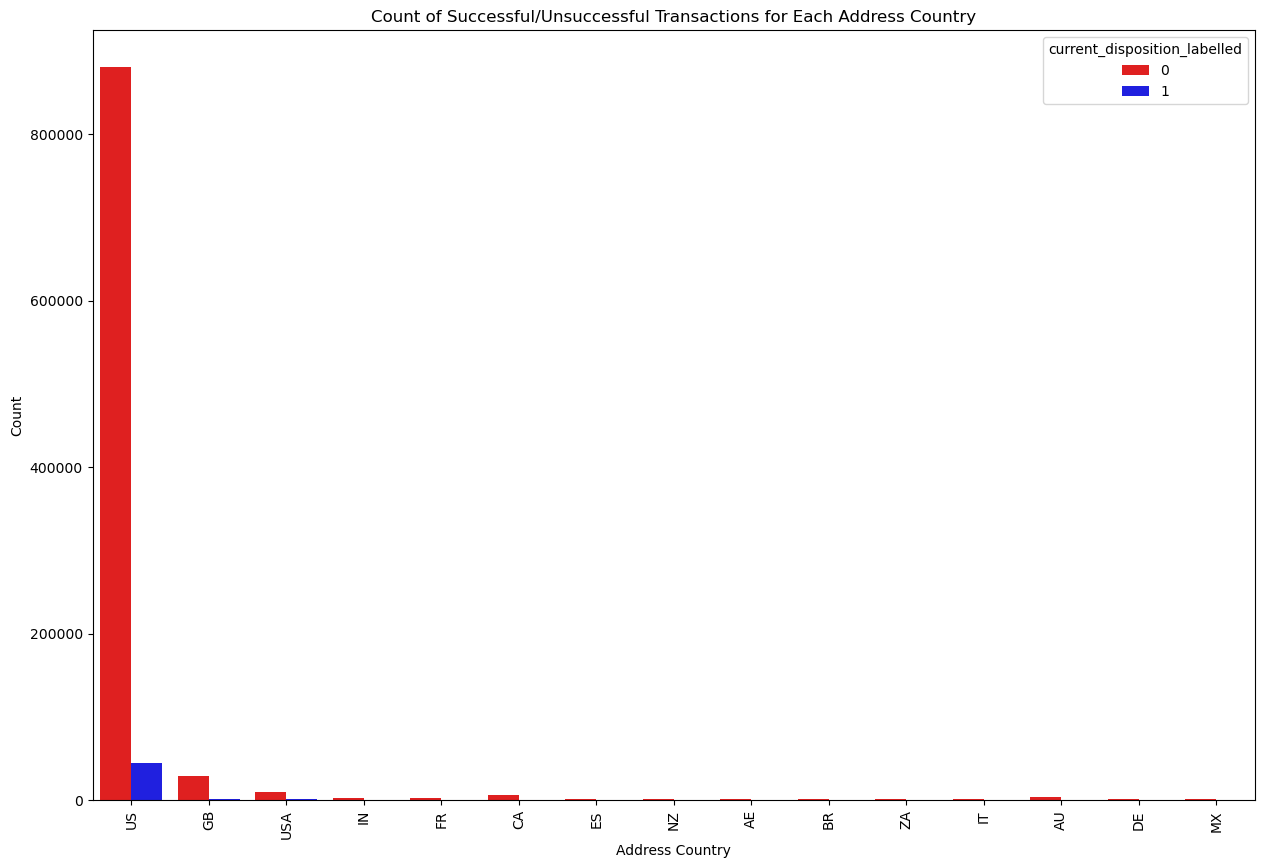

In [157]:
# Create a copy of the dataframe
df_copy = df.copy()

# Drop nan entries in 'address_country'
df_copy = df_copy[df_copy['address_country'].notna()]

# Get the top 15 categories by count
top_15 = df_copy['address_country'].value_counts().index[:15]

# Filter the dataframe to include only top 15 categories
df_copy = df_copy[df_copy['address_country'].isin(top_15)]

# Define the color palette
palette = {0: "red", 1: "blue"}

# Create a grouped bar chart
plt.figure(figsize=(15, 10))
sns.countplot(x='address_country', hue='current_disposition_labelled', data=df_copy, palette=palette)

# Add title and labels
plt.title('Count of Successful/Unsuccessful Transactions for Each Address Country')
plt.xlabel('Address Country')
plt.ylabel('Count')

# Adjust the x-axis labels
plt.xticks(rotation=90)

# Display the plot
plt.show()


In [158]:
# USA=US

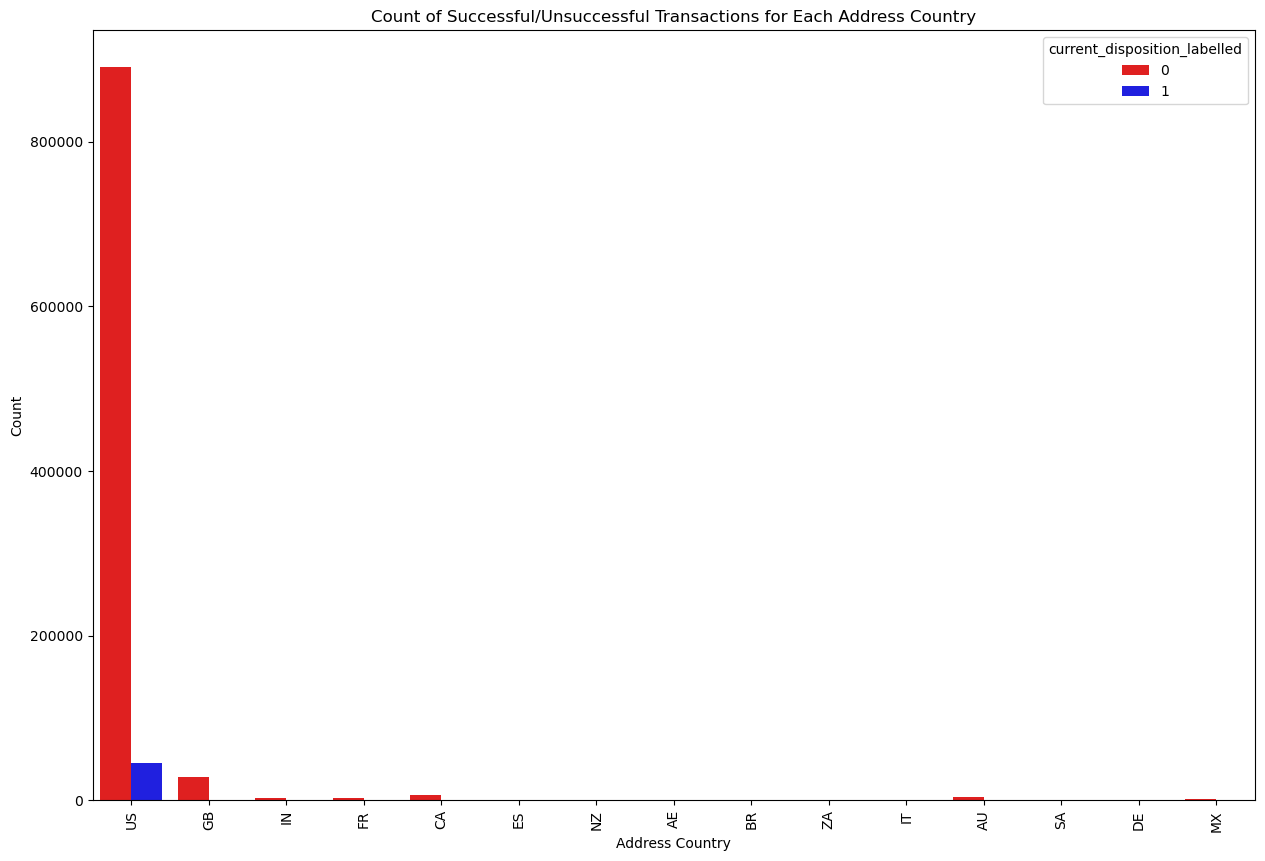

In [159]:
# Create a copy of the dataframe
df_copy = df.copy()

# Consider 'US' and 'USA' as the same, replace 'USA' with 'US'
df_copy['address_country'] = df_copy['address_country'].replace('USA', 'US')

# Drop nan entries in 'address_country'
df_copy = df_copy[df_copy['address_country'].notna()]

# Get the top 15 categories by count
top_15 = df_copy['address_country'].value_counts().index[:15]

# Filter the dataframe to include only top 15 categories
df_copy = df_copy[df_copy['address_country'].isin(top_15)]

# Define the color palette
palette = {0: "red", 1: "blue"}

# Create a grouped bar chart
plt.figure(figsize=(15, 10))
sns.countplot(x='address_country', hue='current_disposition_labelled', data=df_copy, palette=palette)

# Add title and labels
plt.title('Count of Successful/Unsuccessful Transactions for Each Address Country')
plt.xlabel('Address Country')
plt.ylabel('Count')

# Adjust the x-axis labels
plt.xticks(rotation=90)

# Display the plot
plt.show()


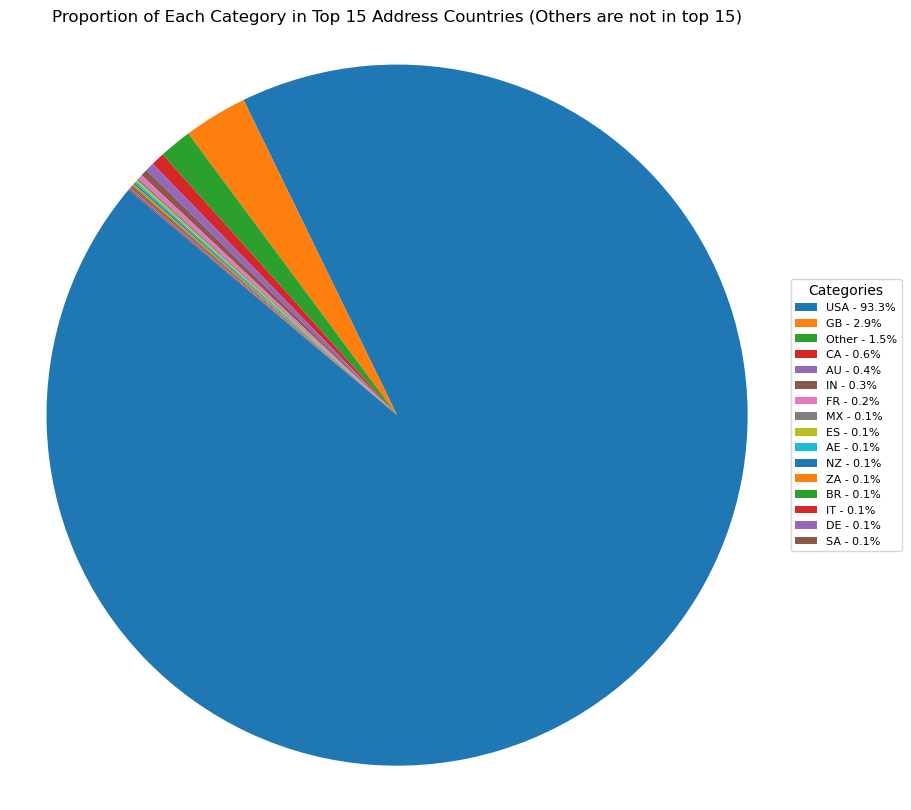

In [160]:
# Create a copy of the dataframe
df_copy = df.copy()

# Consider 'US' and 'USA' as the same, replace 'US' with 'USA'
df_copy['address_country'] = df_copy['address_country'].replace('US', 'USA')

# Drop nan entries in 'address_country'
df_copy = df_copy[df_copy['address_country'].notna()]

# Get the top 15 categories by count
top_15 = df_copy['address_country'].value_counts().index[:15]

# Create a new column 'address_country_top_15' where categories not in top_15 are labeled as 'Other'
df_copy['address_country_top_15'] = df_copy['address_country'].apply(lambda x: x if x in top_15 else 'Other')

# Calculate the proportions of each category
proportions = df_copy['address_country_top_15'].value_counts(normalize=True)

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(proportions, autopct='', startangle=140)  # Removed autopct for labels inside pie

# Draw a legend with smaller fontsize and percentage
ax.legend(
    wedges,
    [f"{i} - {j*100:.1f}%" for i, j in zip(proportions.index, proportions)],
    title="Categories",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=8)  # Smaller fontsize for the legend

ax.set_title('Proportion of Each Category in Top 15 Address Countries (Others are not in top 15)')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Display the plot
plt.show()


#### 5.J. ' recurring' 

In [163]:
print(df['recurring'].head(10))

0    NaN
1    NaN
2    NaN
3    NaN
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: recurring, dtype: float64


In [165]:
unique_values = df['recurring'].unique()
print(unique_values)

[nan  1.  0.]


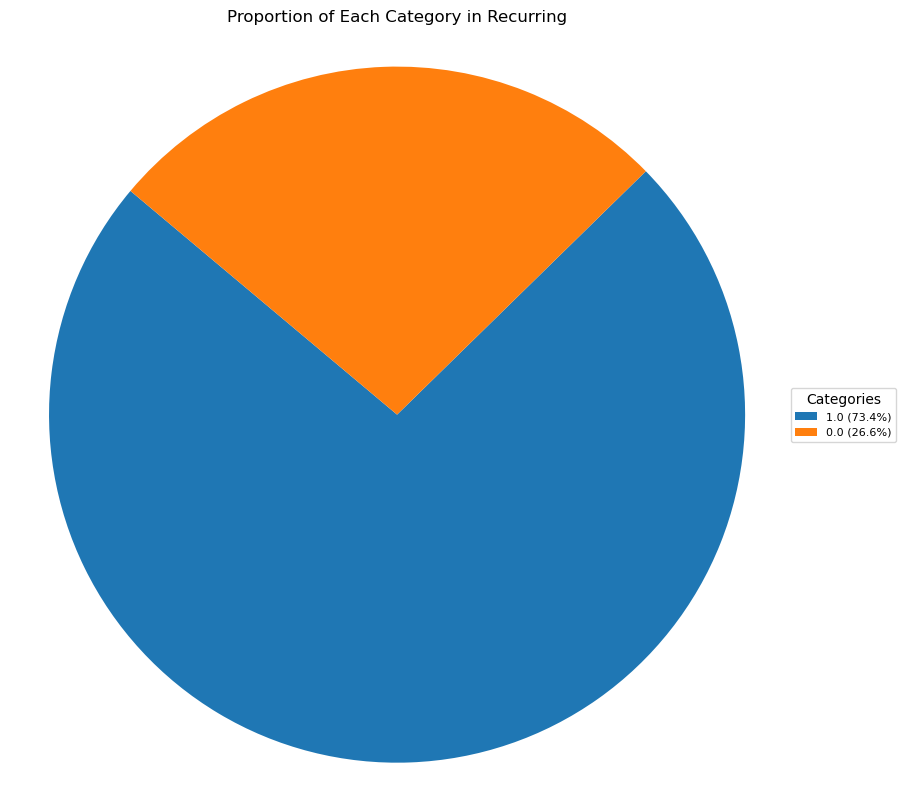

In [166]:
# Create a copy of the dataframe
df_copy = df.copy()

# Drop nan entries in 'recurring'
df_copy = df_copy[df_copy['recurring'].notna()]

# Calculate the proportions of each category
proportions = df_copy['recurring'].value_counts(normalize=True)

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(proportions, autopct='', startangle=140)

# Draw a legend with smaller fontsize
ax.legend(wedges, [f'{i} ({j:.1f}%)' for i, j in zip(proportions.index, proportions*100)],
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=8)  # Smaller fontsize for the legend

ax.set_title('Proportion of Each Category in Recurring')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Display the plot
plt.show()


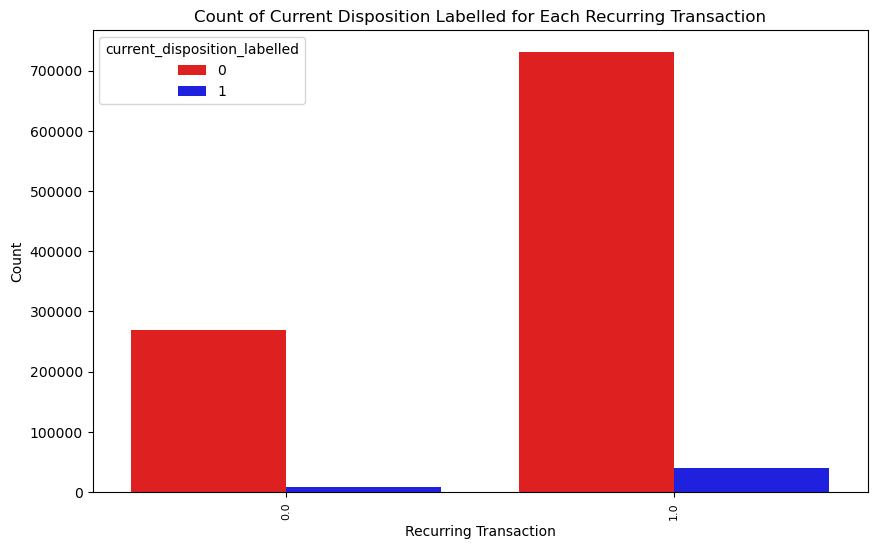

In [167]:
# Specify the figure size
plt.figure(figsize=(10, 6))

# Define the color palette
palette = {0: "red", 1: "blue"}

# Create the countplot
sns.countplot(x='recurring', hue='current_disposition_labelled', data=df, palette=palette)

# Add title and labels
plt.title('Count of Current Disposition Labelled for Each Recurring Transaction')
plt.xlabel('Recurring Transaction')
plt.ylabel('Count')

# Adjust the x-axis labels
plt.xticks(rotation=90, fontsize=8)

# Display the plot
plt.show()


#### 5.K. ' partial_auth' 

In [171]:
print(df['partial_auth'].head(10))

0    NaN
1    NaN
2    NaN
3    NaN
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: partial_auth, dtype: float64


In [172]:
unique_values = df['partial_auth'].unique()
print(unique_values)

[nan  1.  0.]


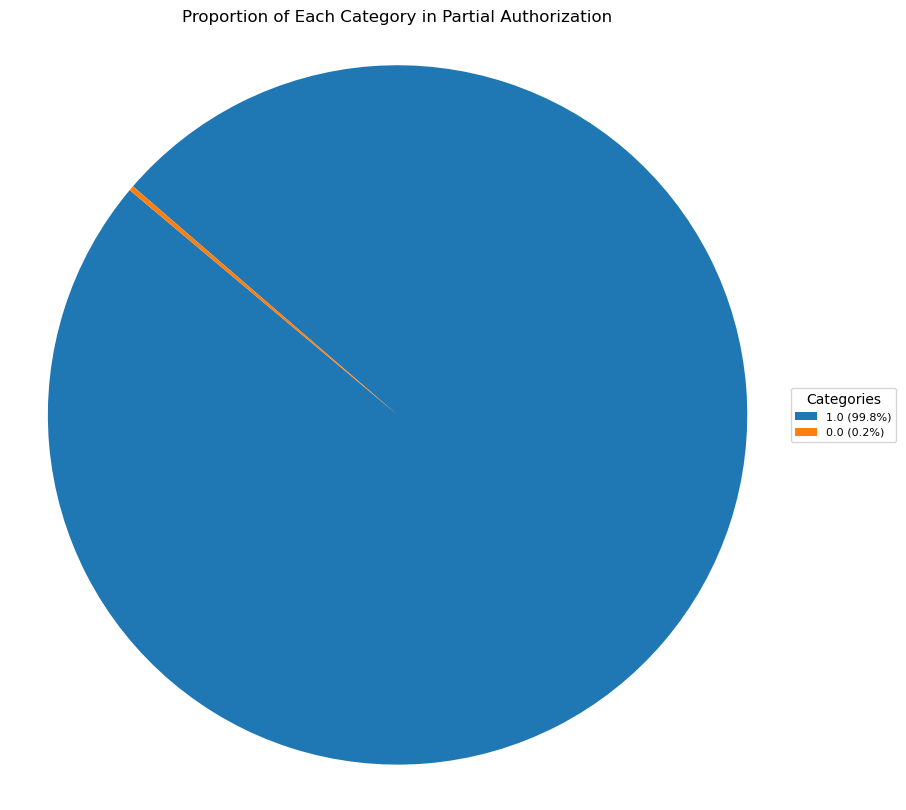

In [170]:
# Create a copy of the dataframe
df_copy = df.copy()

# Drop nan entries in 'partial_auth'
df_copy = df_copy[df_copy['partial_auth'].notna()]

# Calculate the proportions of each category
proportions = df_copy['partial_auth'].value_counts(normalize=True)

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(proportions, autopct='', startangle=140)

# Draw a legend with smaller fontsize
ax.legend(wedges, [f'{i} ({j:.1f}%)' for i, j in zip(proportions.index, proportions*100)],
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=8)  # Smaller fontsize for the legend

ax.set_title('Proportion of Each Category in Partial Authorization')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Display the plot
plt.show()


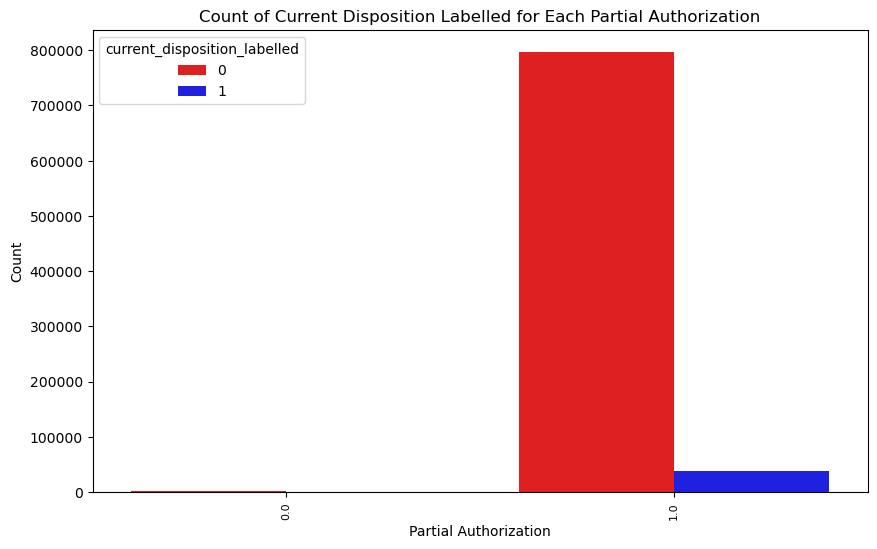

In [173]:
# Specify the figure size
plt.figure(figsize=(10, 6))

# Define the color palette
palette = {0: "red", 1: "blue"}

# Create the countplot
sns.countplot(x='partial_auth', hue='current_disposition_labelled', data=df, palette=palette)

# Add title and labels
plt.title('Count of Current Disposition Labelled for Each Partial Authorization')
plt.xlabel('Partial Authorization')
plt.ylabel('Count')

# Adjust the x-axis labels
plt.xticks(rotation=90, fontsize=8)

# Display the plot
plt.show()


#### 5.L. 'merchant_id ' 

In [176]:
print(df['merchant_id_anonymized'].head(10))

0    Merchant_1
1    Merchant_2
2    Merchant_2
3    Merchant_2
4    Merchant_3
5    Merchant_4
6    Merchant_5
7    Merchant_6
8    Merchant_7
9    Merchant_8
Name: merchant_id_anonymized, dtype: object


In [177]:
unique_values = df['merchant_id_anonymized'].unique()
print(unique_values)

['Merchant_1' 'Merchant_2' 'Merchant_3' 'Merchant_4' 'Merchant_5'
 'Merchant_6' 'Merchant_7' 'Merchant_8' 'Merchant_9' 'Merchant_10'
 'Merchant_11' 'Merchant_12' 'Merchant_13' 'Merchant_14' 'Merchant_15'
 'Merchant_16' 'Merchant_17' 'Merchant_18' 'Merchant_19' 'Merchant_20'
 'Merchant_21' 'Merchant_22' 'Merchant_23' 'Merchant_24' 'Merchant_25'
 'Merchant_26' 'Merchant_27' 'Merchant_28' 'Merchant_29' 'Merchant_30'
 'Merchant_31' 'Merchant_32' 'Merchant_33' 'Merchant_34' 'Merchant_35'
 'Merchant_36' 'Merchant_37' 'Merchant_38' 'Merchant_39' 'Merchant_40'
 'Merchant_41' 'Merchant_42' 'Merchant_43' 'Merchant_44' 'Merchant_45'
 'Merchant_46' 'Merchant_47' 'Merchant_48' 'Merchant_49' 'Merchant_50'
 'Merchant_51' 'Merchant_52' 'Merchant_53' 'Merchant_54' 'Merchant_55'
 'Merchant_56' 'Merchant_57' 'Merchant_58' 'Merchant_59' 'Merchant_60']


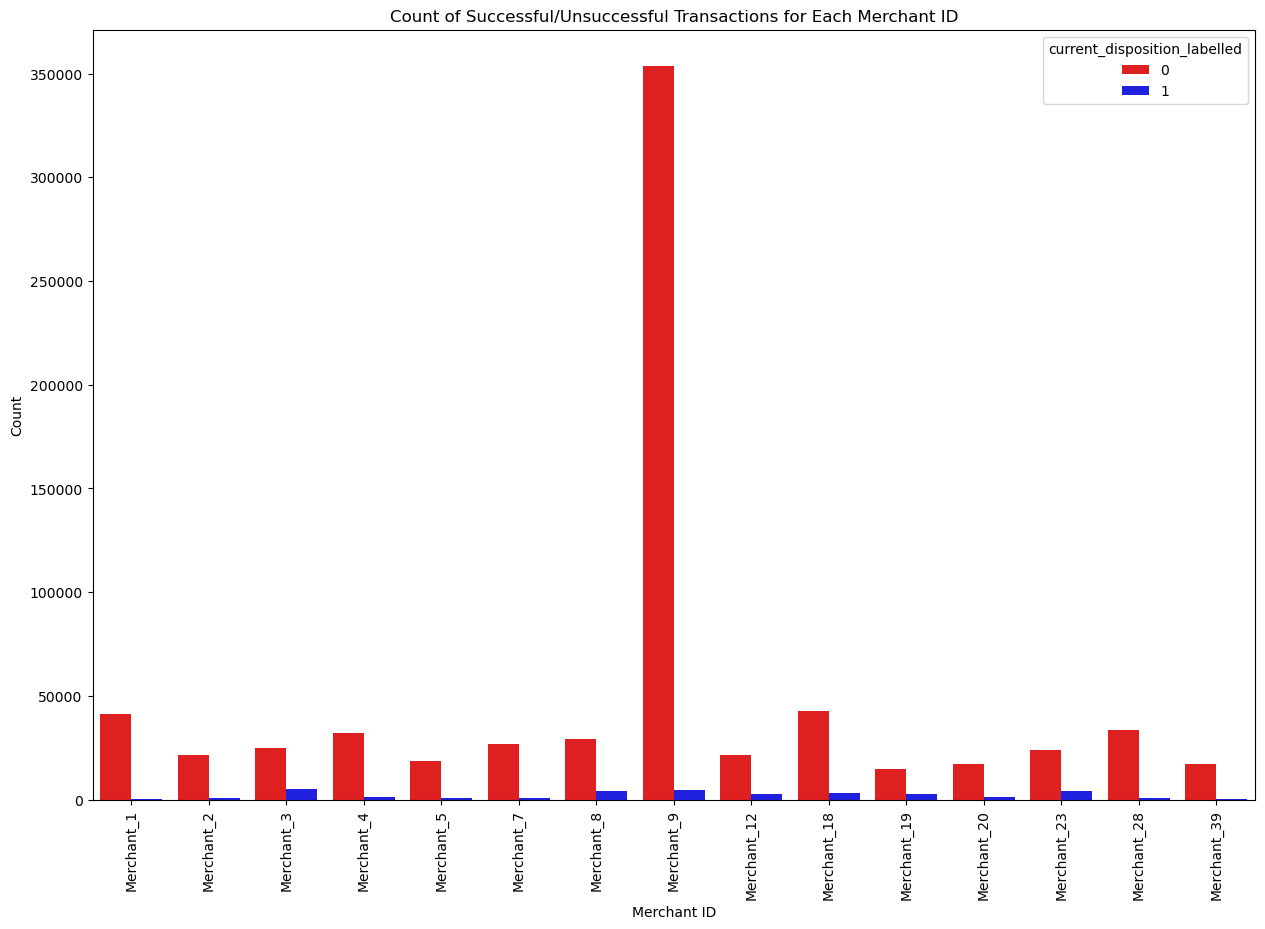

In [178]:
# Create a copy of the dataframe
df_copy = df.copy()

# Get the top 15 categories by count
top_15 = df_copy['merchant_id_anonymized'].value_counts().index[:15]

# Filter the dataframe to include only top 15 categories
df_copy = df_copy[df_copy['merchant_id_anonymized'].isin(top_15)]

# Define the color palette
palette = {0: "red", 1: "blue"}

# Create a grouped bar chart
plt.figure(figsize=(15, 10))
sns.countplot(x='merchant_id_anonymized', hue='current_disposition_labelled', data=df_copy, palette=palette)

# Add title and labels
plt.title('Count of Successful/Unsuccessful Transactions for Each Merchant ID')
plt.xlabel('Merchant ID')
plt.ylabel('Count')

# Adjust the x-axis labels
plt.xticks(rotation=90)

# Display the plot
plt.show()


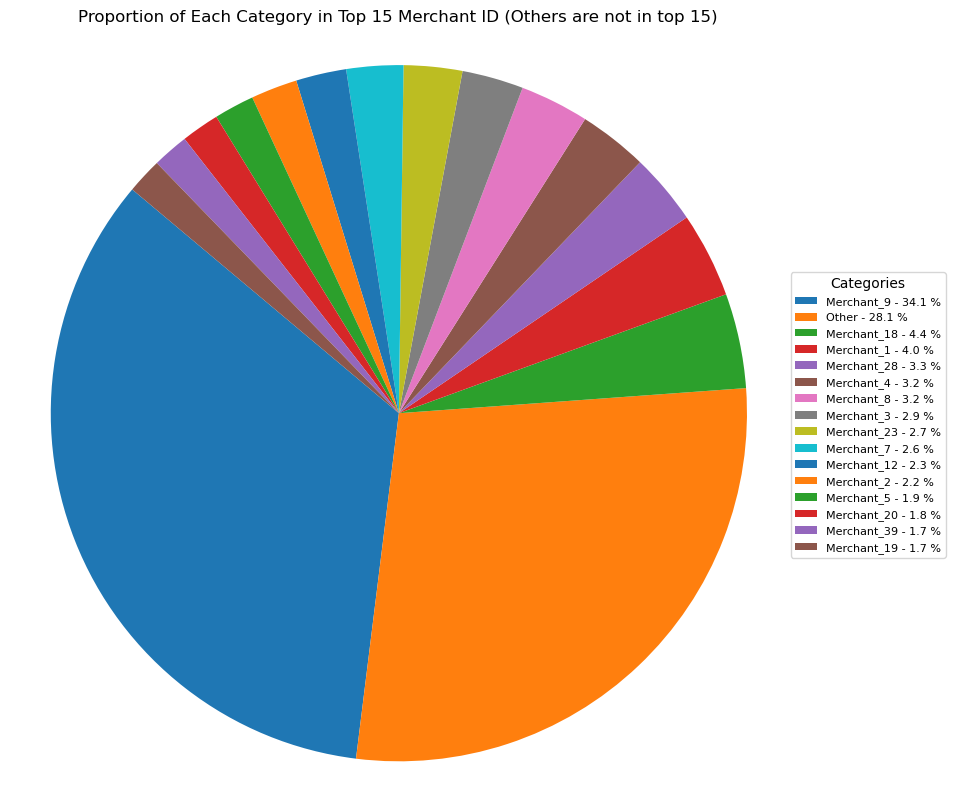

In [179]:
# Create a copy of the dataframe
df_copy = df.copy()

# Get the top 15 categories by count
top_15 = df_copy['merchant_id_anonymized'].value_counts().index[:15]

# Create a new column 'merchant_id_anonymized_top_15' where categories not in top_15 are labeled as 'Other'
df_copy['merchant_id_anonymized_top_15'] = df_copy['merchant_id_anonymized'].apply(lambda x: x if x in top_15 else 'Other')

# Calculate the proportions of each category
proportions = df_copy['merchant_id_anonymized_top_15'].value_counts(normalize=True)

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts = ax.pie(proportions, startangle=140)

# Draw a legend with smaller fontsize
legend_labels = ['{0} - {1:1.1f} %'.format(i,j*100) for i,j in zip(proportions.index, proportions)]
ax.legend(wedges, legend_labels,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=8)  # Smaller fontsize for the legend

ax.set_title('Proportion of Each Category in Top 15 Merchant ID (Others are not in top 15)')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Display the plot
plt.show()


 #### 5.M.  autobill_cycle , billing_plan_cycle

In [182]:
print(df['autobill_cycle'].head(10))

0    NaN
1    NaN
2    NaN
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: autobill_cycle, dtype: float64


In [187]:
unique_values = df['autobill_cycle'].unique()
print(unique_values)

[ nan   0.   3.  13.   4.   2.   1.  11.  41.  20.  19.  34.  44.   5.
  32.   7.   9.  14.  12.  33.  23.   6.   8.  21.  16.  27.  17.  37.
  18.  24.  29.  80.  30.  15.  52.  47.  48.  35.  38.  10.  26.  36.
  39.  22.  73.  42.  43.  53.  25.  62.  72.  60.  45.  68.  46.  63.
  66.  57.  49.  58.  55.  31.  51.  69.  65.  54.  28.  61.  40.  56.
  59.  50. 121.  77.  64.  90.  84.  74.  76. 118.  71.  78.  75.  86.
  89.  70.  97. 119.  87. 251.  81. 108.  88.  96.  83. 115. 104.  67.
  95. 100.  91. 105. 117. 138.  79.  82.  94. 113. 101. 116. 123. 137.
 110.  92.  98. 111. 107.  85. 150. 125. 103. 114. 145.  93. 126. 140.
 109. 106.  99. 252. 128. 122.]


In [ ]:
 billing_plan_cycle

In [185]:
print(df['billing_plan_cycle'].head(10))

0    NaN
1    NaN
2    NaN
3    NaN
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: billing_plan_cycle, dtype: float64


In [186]:
unique_values = df['billing_plan_cycle'].unique()
print(unique_values)

[ nan   0.   3.  13.   4.   2.   1.  11.  41.  20.  19.  34.  44.   5.
  32.   7.   9.  14.  12.  33.  23.   6.   8.  21.  16.  27.  17.  37.
  18.  24.  29.  80.  30.  15.  52.  47.  48.  35.  38.  10.  26.  36.
  39.  22.  73.  42.  43.  53.  25.  62.  72.  60.  45.  68.  46.  63.
  66.  57.  49.  58.  55.  31.  51.  69.  65.  54.  28.  61.  40.  56.
  59.  50. 121.  77.  64.  90.  84.  74.  76. 118.  71.  78.  75.  86.
  89.  70.  97. 119.  87. 251.  81. 108.  88.  96.  83. 115. 104.  67.
  95. 100.  91. 105. 117. 138.  79.  82.  94. 113. 101. 116. 123. 137.
 110.  92.  98. 111. 107.  85. 150. 125. 103. 114. 145.  93. 126. 140.
 109. 106.  99. 252. 128. 122.]


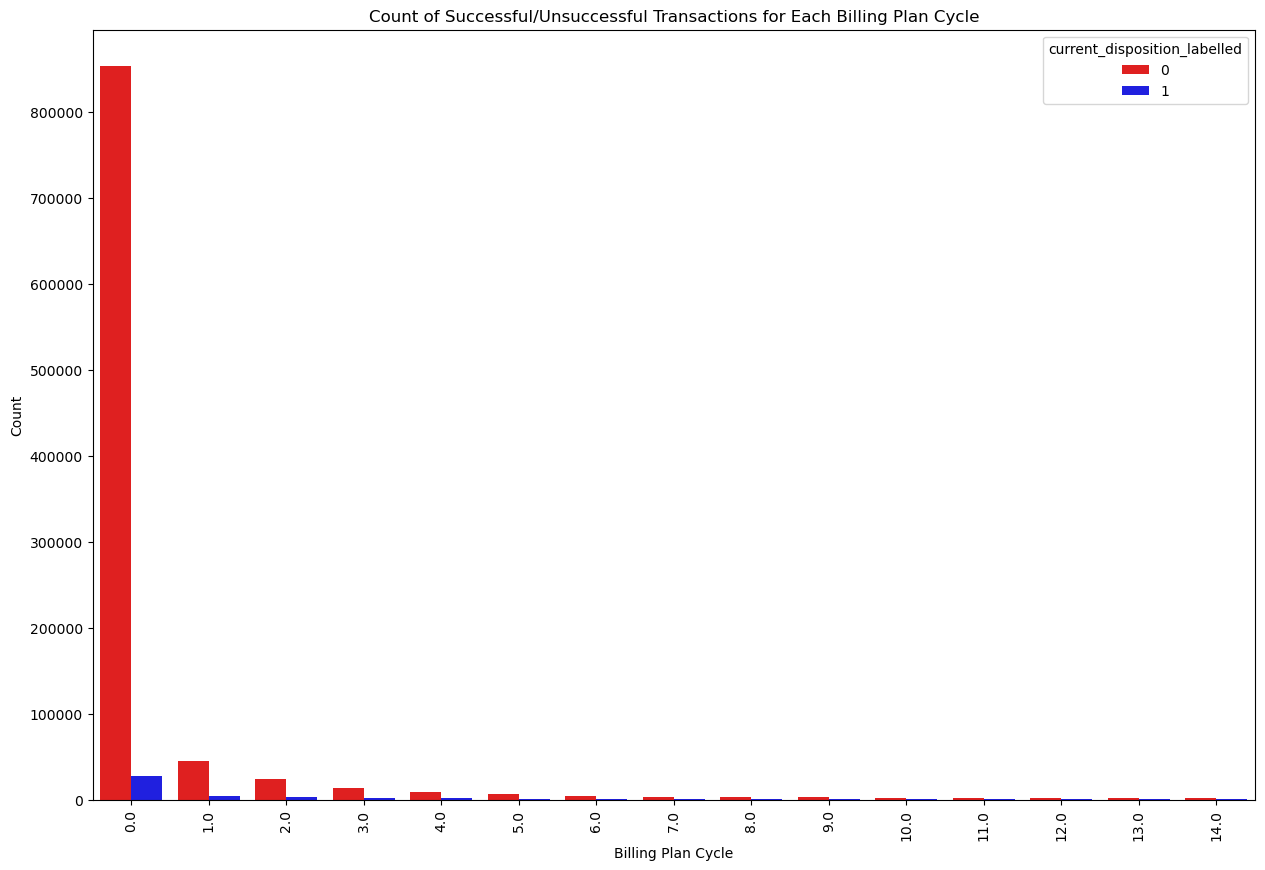

In [188]:
# Create a copy of the dataframe
df_copy = df.copy()

# Get the top 15 categories by count
top_15 = df_copy['billing_plan_cycle'].value_counts().index[:15]

# Filter the dataframe to include only top 15 categories
df_copy = df_copy[df_copy['billing_plan_cycle'].isin(top_15)]

# Define the color palette
palette = {0: "red", 1: "blue"}

# Create a grouped bar chart
plt.figure(figsize=(15, 10))
sns.countplot(x='billing_plan_cycle', hue='current_disposition_labelled', data=df_copy, palette=palette)

# Add title and labels
plt.title('Count of Successful/Unsuccessful Transactions for Each Billing Plan Cycle')
plt.xlabel('Billing Plan Cycle')
plt.ylabel('Count')

# Adjust the x-axis labels
plt.xticks(rotation=90)

# Display the plot
plt.show()


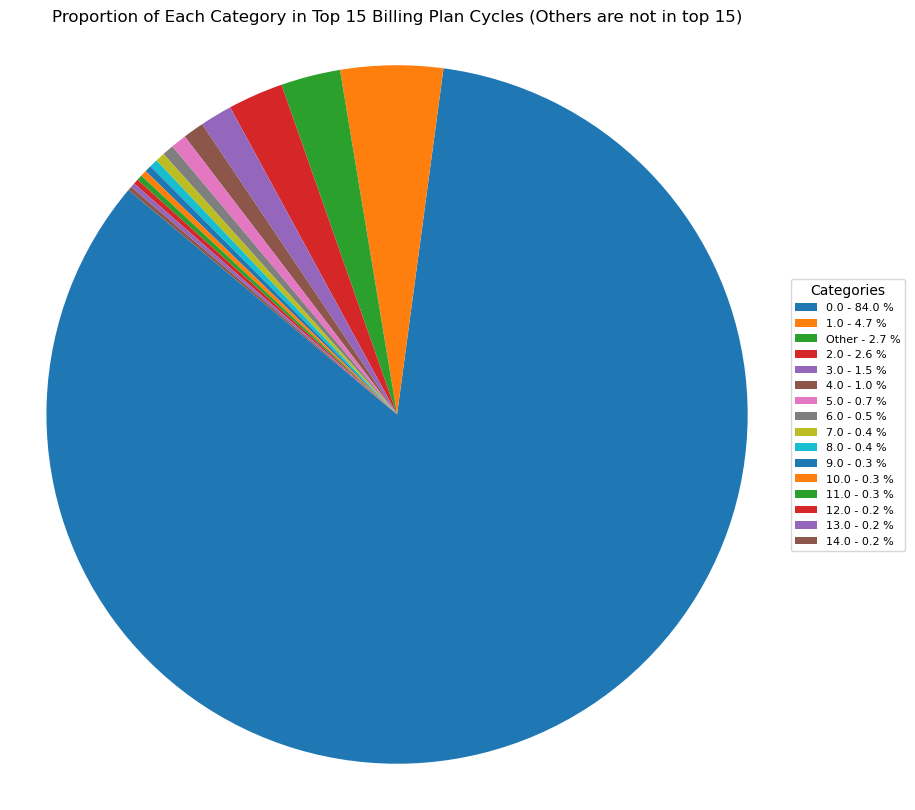

In [190]:

# Create a copy of the dataframe
df_copy = df.copy()

# Get the top 15 categories by count
top_15 = df_copy['billing_plan_cycle'].value_counts().index[:15]

# Create a new column 'billing_plan_cycle_top_15' where categories not in top_15 are labeled as 'Other'
df_copy['billing_plan_cycle_top_15'] = df_copy['billing_plan_cycle'].apply(lambda x: x if x in top_15 else 'Other')

# Calculate the proportions of each category
proportions = df_copy['billing_plan_cycle_top_15'].value_counts(normalize=True)

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts = ax.pie(proportions, startangle=140)

# Draw a legend with smaller fontsize
legend_labels = ['{0} - {1:1.1f} %'.format(i,j*100) for i,j in zip(proportions.index, proportions)]
ax.legend(wedges, legend_labels,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=8)  # Smaller fontsize for the legend

ax.set_title('Proportion of Each Category in Top 15 Billing Plan Cycles (Others are not in top 15)')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Display the plot
plt.show()


 #### 5.N.  'forced_deposit'

In [193]:
print(df['forced_deposit'].head(10))

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: forced_deposit, dtype: float64


In [195]:
unique_values = df['forced_deposit'].unique()
print(unique_values)

[nan  1.]


In [196]:
# we will say that nan= 0

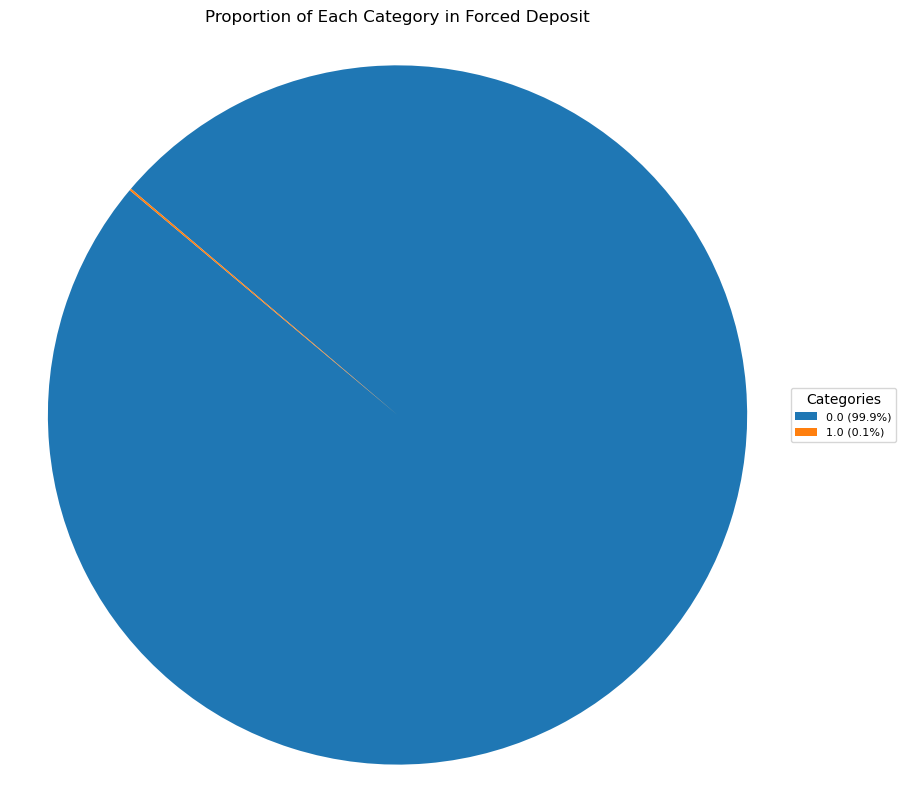

In [197]:
# Create a copy of the dataframe
df_copy = df.copy()

# Replace null entries in 'forced_deposit' with 0
df_copy['forced_deposit'].fillna(0, inplace=True)

# Calculate the proportions of each category
proportions = df_copy['forced_deposit'].value_counts(normalize=True)

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(proportions, autopct='', startangle=140)

# Draw a legend with smaller fontsize
ax.legend(wedges, [f'{i} ({j:.1f}%)' for i, j in zip(proportions.index, proportions*100)],
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=8)  # Smaller fontsize for the legend

ax.set_title('Proportion of Each Category in Forced Deposit')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Display the plot
plt.show()


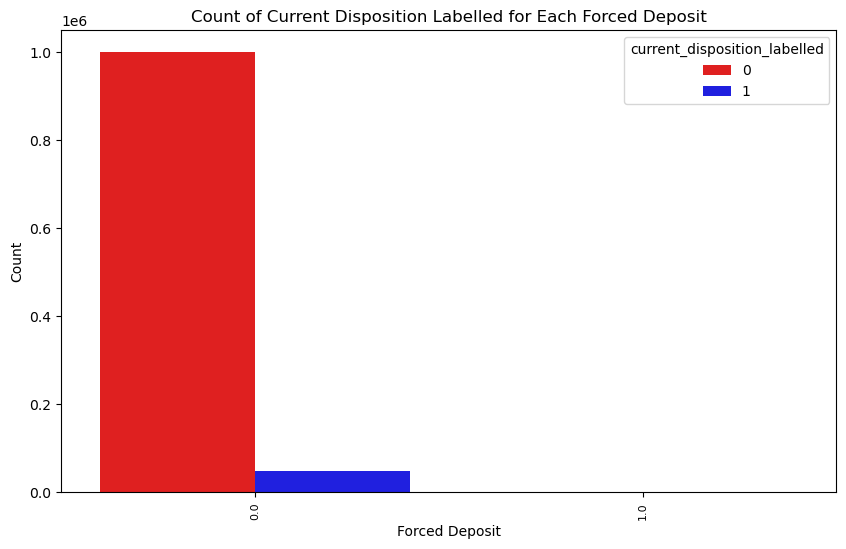

In [198]:
# Create a copy of the dataframe
df_copy = df.copy()

# Replace null entries in 'forced_deposit' with 0
df_copy['forced_deposit'].fillna(0, inplace=True)

# Specify the figure size
plt.figure(figsize=(10, 6))

# Define the color palette
palette = {0: "red", 1: "blue"}

# Create the countplot
sns.countplot(x='forced_deposit', hue='current_disposition_labelled', data=df_copy, palette=palette)

# Add title and labels
plt.title('Count of Current Disposition Labelled for Each Forced Deposit')
plt.xlabel('Forced Deposit')
plt.ylabel('Count')

# Adjust the x-axis labels
plt.xticks(rotation=90, fontsize=8)

# Display the plot
plt.show()


### 6.Statistics Tests

#### 'credit_card_brand'

In [200]:
# Create a cross-tabulation table
contingency_table = pd.crosstab(df['credit_card_brand'], df['current_disposition_labelled'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 6110.362615055671
p-value: 0.0


In [201]:
# The Chi-square statistic is quite large
# pvalue < 0.05 

In [203]:
#These results suggest that there is a significant association between the type of credit card brand 
# and the success or failure of a transaction, as indicated by the
#current_disposition_labelled variable

In [206]:
#checking the brand Highest 'frequencies of failed transactions '

In [205]:
# Calculate expected frequencies
expected_df = pd.DataFrame(expected, 
                           columns=contingency_table.columns, 
                           index=contingency_table.index)

# Calculate observed - expected frequencies for failed transactions
difference_df = contingency_table.subtract(expected_df)
difference_failed_transactions = difference_df[0]  # Assuming '0' represents failed transactions

# Sort by difference and print
difference_failed_transactions_sorted = difference_failed_transactions.sort_values(ascending=False)
print(difference_failed_transactions_sorted)


credit_card_brand
MASTERCARD                   2197.469234
AMERICAN EXPRESS              986.691495
VISA/DANKORT                    1.380086
EBT                             0.719559
VERVE                           0.479706
ELO                             0.287823
MAESTRO                         0.287823
JCB                             0.287823
CIRRUS                          0.239853
FUEL CARD                       0.143912
PRIVATE LABEL                   0.143912
RUPAY                           0.143912
NSPK MIR                        0.095941
CHINA UNION PAY                -0.424353
DINERS CLUB INTERNATIONAL      -0.712177
VISA                        -1008.424615
DISCOVER                    -2178.809935
Name: 0, dtype: float64


In [213]:
# SUMMARY TABLE- The most important part & conclusions 

In [212]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load data

df = pd.read_csv('hackathon_date_1_year_labelled_anonymized.csv')

variables = ['payment_provider', 'payment_method_id', 'credit_card_type', 'credit_card_bin', 'credit_card_brand', 'credit_card_issuing_bank', 'credit_card_issuing_bank_country', 'currency_alphabetic_code', 'address_country', 'recurring', 'partial_auth', 'merchant_id_anonymized', 'billing_plan_cycle', 'forced_deposit']

# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Variable', 'Chi-square', 'p-value', 'Significant', 'Top1 Category', 'Top1 Freq', 'Top2 Category', 'Top2 Freq', 'Top3 Category', 'Top3 Freq'])

for var in variables:
    # Create a cross-tabulation table
    contingency_table = pd.crosstab(df[var], df['current_disposition_labelled'])
    
    # Perform Chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Calculate expected frequencies
    expected_df = pd.DataFrame(expected, 
                               columns=contingency_table.columns, 
                               index=contingency_table.index)

    # Calculate observed - expected frequencies for failed transactions
    difference_df = contingency_table.subtract(expected_df)
    difference_failed_transactions = difference_df[0]  # Assuming '0' represents failed transactions

    # Sort by difference and get top 3 categories and their frequencies
    difference_failed_transactions_sorted = difference_failed_transactions.sort_values(ascending=False)
    top_3_freqs = difference_failed_transactions_sorted.head(3)
    
    # Append results to result_df
    result_df = pd.concat([result_df, pd.DataFrame({'Variable': [var],
                                                    'Chi-square': [chi2],
                                                    'p-value': [p],
                                                    'Significant': ['Yes' if p < 0.05 else 'No'],
                                                    'Top1 Category': [top_3_freqs.index[0] if len(top_3_freqs) > 0 else None],
                                                    'Top1 Freq': [top_3_freqs.iloc[0] if len(top_3_freqs) > 0 else None],
                                                    'Top2 Category': [top_3_freqs.index[1] if len(top_3_freqs) > 1 else None],
                                                    'Top2 Freq': [top_3_freqs.iloc[1] if len(top_3_freqs) > 1 else None],
                                                    'Top3 Category': [top_3_freqs.index[2] if len(top_3_freqs) > 2 else None],
                                                    'Top3 Freq': [top_3_freqs.iloc[2] if len(top_3_freqs) > 2 else None]})], ignore_index=True)

# Save result_df as an Excel file
result_df.to_excel('chi_square_test_results.xlsx', index=False)

# Print the result
print(result_df)


                            Variable     Chi-square        p-value  \
0                   payment_provider   36204.822478   0.000000e+00   
1                  payment_method_id  858939.344147   0.000000e+00   
2                   credit_card_type     153.674914   4.264975e-34   
3                    credit_card_bin   83816.373433   0.000000e+00   
4                  credit_card_brand    6110.362615   0.000000e+00   
5           credit_card_issuing_bank   42999.241522   0.000000e+00   
6   credit_card_issuing_bank_country    2055.922818   0.000000e+00   
7           currency_alphabetic_code     557.995812  2.685778e-116   
8                    address_country    1440.463217  5.660166e-184   
9                          recurring    1582.895805   0.000000e+00   
10                      partial_auth       1.286386   2.567151e-01   
11            merchant_id_anonymized   59203.029061   0.000000e+00   
12                billing_plan_cycle   32585.423423   0.000000e+00   
13                  